# Importación modulos y datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize

import funciones as f

matplotlib.style.use('ggplot')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv("../data/conchillas_orig.csv", low_memory = False, keep_default_na = False, na_values = '')
print(data.shape)
data.head(5)

(1688, 12)


,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Labio,cox1-lsu
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,LU,1,AA
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,LU,1,HG
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,LU,1,NaN
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,LU,0,NaN
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,LU,1,NaN


# Exploración y limpieza de datos

In [ ]:
data.info()

In [ ]:
# No hay individuos juveniles en el dataset (ancho total menor a 8 milímetros o ausencia de labio)

len(np.logical_or(data.Labio == 1, data.AT >= 8)) == len(data)

In [4]:
# Creación de diccionario y reemplazo de haplotipos combinados (105) por haplogrupos (3)
ht = ['AA', 'AB', 'BA', 'CA', 'DA', 'EA', 'FA', 'LA', 'NA', 'OA', 'JH', 'KI', 'GC', 'GD', 'GE', 'GF', 'HG', 'IG', 'MG']
hg = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2']
hg_ht_rep = dict(zip(ht, hg))

data["haplogrupos"] = data["cox1-lsu"].replace(hg_ht_rep)

In [ ]:
data.iloc[:,2:-3].describe()

In [ ]:
round(data['Morfotipo'].value_counts(normalize = True)*100, 2)
data['haplogrupos'].value_counts()
data['cox1-lsu'].value_counts()

In [5]:
data = pd.get_dummies(data, columns = ["Morfotipo"], drop_first = True)
data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Labio,cox1-lsu,haplogrupos,Morfotipo_LB,Morfotipo_LU
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,1,AA,0,0,1
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,1,HG,2,0,1
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,1,NaN,NaN,0,1
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,0,NaN,NaN,0,1
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,1,NaN,NaN,0,1


### Creación columnas nuevas

In [6]:
# Ratios
# Cada parte sobre sí misma
data["Ratio_LE_AE"] = data["LE"]/data["AE"] # Espira
data["Ratio_LT_AT"] = data["LT"]/data["AT"] # Total
data["Ratio_LA_AA"] = data["LA"]/data["AA"] # Abertura

# Espira / Total
data["Ratio_LE_LT"] = data["LE"]/data["LT"] # Largo
data["Ratio_AE_AT"] = data["AE"]/data["AT"] # Ancho

# Abertura / Total
data["Ratio_LA_LT"] = data["LA"]/data["LT"] # Largo
data["Ratio_AA_AT"] = data["AA"]/data["AT"] # Ancho

# Espira / Abertura
data["Ratio_LE_LA"] = data["LE"]/data["LA"] # Largo
data["Ratio_AE_AA"] = data["AE"]/data["AA"] # Ancho

data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Labio,...,Morfotipo_LU,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,1,...,1,0.366776,0.747684,0.860321,0.212583,0.433357,0.663489,0.576622,0.320402,0.751545
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,1,...,1,0.261101,0.713672,0.918495,0.177108,0.484093,0.706024,0.548581,0.250853,0.882445
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,1,...,1,0.288274,0.722585,0.742092,0.177889,0.445897,0.613065,0.596950,0.290164,0.746959
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,0,...,1,0.333333,0.785593,0.754573,0.237325,0.559322,0.533981,0.555932,0.444444,1.006098
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,1,...,1,0.369028,0.755764,0.849034,0.213537,0.437320,0.670162,0.596542,0.318634,0.733092


In [7]:
# Powers
potencia = 4

# Espira
data["Power_LE"] = data["LE"] ** potencia # Largo
data["Power_AE"] = data["AE"] ** potencia # Ancho

# Total
data["Power_LT"] = data["LT"] ** potencia # Largo
data["Power_AT"] = data["AT"] ** potencia # Ancho

# Abertura
data["Power_LA"] = data["LA"] ** potencia # Largo
data["Power_AA"] = data["AA"] ** potencia # Ancho

# Número de vueltas
data["Power_NV"] = data["NV"] ** potencia

data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Labio,...,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA,Power_LE,Power_AE,Power_LT,Power_AT,Power_LA,Power_AA,Power_NV
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,1,...,0.576622,0.320402,0.751545,24.729734,1366.514729,12108.823608,38746.339913,2346.588611,4283.453794,777.205187
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,1,...,0.548581,0.250853,0.882445,4.669489,1004.693470,4745.832100,18294.428998,1179.208128,1656.848179,610.134461
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,1,...,0.596950,0.290164,0.746959,9.815062,1421.259840,9801.495006,35953.051846,1384.584100,4565.488679,681.841766
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,0,...,0.555932,0.444444,1.006098,23.425600,1897.473600,7384.463302,19387.777600,600.372506,1851.890729,875.781161
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,1,...,0.596542,0.318634,0.733092,25.176310,1357.546656,12108.823608,37115.717839,2442.425357,4700.254211,783.109853


In [8]:
# Power_ratios
# (Cada parte sobre sí misma) ** potencia
data["Power_Ratio_LE_AE"] = data["Ratio_LE_AE"] ** potencia # Espira
data["Power_Ratio_LT_AT"] = data["Ratio_LT_AT"] ** potencia # Total
data["Power_Ratio_LA_AA"] = data["Ratio_LA_AA"] ** potencia # Abertura

# (Espira / Total) ** potencia
data["Power_Ratio_LE_LT"] = data["Ratio_LE_LT"] ** potencia # Largo
data["Power_Ratio_AE_AT"] = data["Ratio_AE_AT"] ** potencia # Ancho

# (Abertura / Total) ** potencia
data["Power_Ratio_LA_LT"] = data["Ratio_LA_LT"] ** potencia # Largo
data["Power_Ratio_AA_AT"] = data["Ratio_AA_AT"] ** potencia # Ancho

# (Espira / Abertura) ** potencia
data["Power_Ratio_LE_LA"] = data["Ratio_LE_LA"] ** potencia # Largo
data["Power_Ratio_AE_AA"] = data["Ratio_AE_AA"] ** potencia # Ancho

In [9]:
data.columns

Index(['Lote', 'Individuo', 'AE', 'LE', 'AT', 'LT', 'AA', 'LA', 'NV', 'Labio',
       'cox1-lsu', 'haplogrupos', 'Morfotipo_LB', 'Morfotipo_LU',
       'Ratio_LE_AE', 'Ratio_LT_AT', 'Ratio_LA_AA', 'Ratio_LE_LT',
       'Ratio_AE_AT', 'Ratio_LA_LT', 'Ratio_AA_AT', 'Ratio_LE_LA',
       'Ratio_AE_AA', 'Power_LE', 'Power_AE', 'Power_LT', 'Power_AT',
       'Power_LA', 'Power_AA', 'Power_NV', 'Power_Ratio_LE_AE',
       'Power_Ratio_LT_AT', 'Power_Ratio_LA_AA', 'Power_Ratio_LE_LT',
       'Power_Ratio_AE_AT', 'Power_Ratio_LA_LT', 'Power_Ratio_AA_AT',
       'Power_Ratio_LE_LA', 'Power_Ratio_AE_AA'],
      dtype='object')

### Relación entre variables

In [10]:
Medidas = ['AE', 'LE', 'AT', 'LT', 'AA', 'LA', 'NV', 'Morfotipo_LB', 'Morfotipo_LU']
Ratios = ['Ratio_LE_AE', 'Ratio_LT_AT', 'Ratio_LA_AA', 'Ratio_LE_LT', 'Ratio_AE_AT', 'Ratio_LA_LT', 'Ratio_AA_AT', 'Ratio_LE_LA', 'Ratio_AE_AA', 'Morfotipo_LB', 'Morfotipo_LU']
Powers = ['Power_LE', 'Power_AE', 'Power_LT', 'Power_AT', 'Power_LA', 'Power_AA', 'Power_NV', 'Morfotipo_LB', 'Morfotipo_LU']
Powers_ratios = ['Power_Ratio_LE_AE', 'Power_Ratio_LT_AT', 'Power_Ratio_LA_AA', 'Power_Ratio_LE_LT', 'Power_Ratio_AE_AT', 'Power_Ratio_LA_LT', 'Power_Ratio_AA_AT', 'Power_Ratio_LE_LA', 'Power_Ratio_AE_AA', 'Morfotipo_LB', 'Morfotipo_LU']
Todo = Medidas + Ratios + Powers + Powers_ratios
Todo = list(dict.fromkeys(Todo)) #para eliminar elementos duplicados de una lista
print(Todo)

['AE', 'LE', 'AT', 'LT', 'AA', 'LA', 'NV', 'Morfotipo_LB', 'Morfotipo_LU', 'Ratio_LE_AE', 'Ratio_LT_AT', 'Ratio_LA_AA', 'Ratio_LE_LT', 'Ratio_AE_AT', 'Ratio_LA_LT', 'Ratio_AA_AT', 'Ratio_LE_LA', 'Ratio_AE_AA', 'Power_LE', 'Power_AE', 'Power_LT', 'Power_AT', 'Power_LA', 'Power_AA', 'Power_NV', 'Power_Ratio_LE_AE', 'Power_Ratio_LT_AT', 'Power_Ratio_LA_AA', 'Power_Ratio_LE_LT', 'Power_Ratio_AE_AT', 'Power_Ratio_LA_LT', 'Power_Ratio_AA_AT', 'Power_Ratio_LE_LA', 'Power_Ratio_AE_AA']


In [ ]:
#variables originales del dataset
f._print_matriz_correlacion(data[Medidas].corr())

In [ ]:
#variables originales del dataset
f._print_matriz_correlacion(data[Ratios].corr())

In [ ]:
#variables originales del dataset
f._print_matriz_correlacion(data[Powers].corr())

In [ ]:
#variables originales del dataset
f._print_matriz_correlacion(data[Powers_ratios].corr())

In [ ]:
# sns.pairplot(data=data,x_vars = Medidas,\
#          y_vars= Medidas,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [ ]:
# sns.pairplot(data=data,x_vars = Ratios,\
#          y_vars= Ratios,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [ ]:
# sns.pairplot(data=data,x_vars = Powers,\
#          y_vars= Powers,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [ ]:
# sns.pairplot(data=data,x_vars = Powers_ratios,\
#          y_vars= Powers_ratios,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [ ]:
#sns.pairplot(data=data,x_vars = Todo,\
#         y_vars= Todo,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

### Distribución de las observaciones

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 9))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  
    plt.show()

In [ ]:
draw_histograms(data, data[Medidas], 4, 4)

In [ ]:
draw_histograms(data, data[Powers], 4, 4)

In [ ]:
draw_histograms(data, data[Ratios], 4, 4)

In [ ]:
draw_histograms(data, data[Powers_ratios], 4, 4)

# Modelos de clustering

## Importación modulos y dataset

In [11]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabasz_score
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.cm as cm

## KMEANS

### Variables

In [12]:
x1 = data[Medidas]
x2 = data[Powers]
x3 = data[Ratios]
x4 = data[Powers_ratios]
x5 = data[Todo]
y_true = data["haplogrupos"]

scaler = StandardScaler()
x1_scaled=scaler.fit_transform(x1)
x2_scaled=scaler.fit_transform(x2)
x3_scaled=scaler.fit_transform(x3)
x4_scaled=scaler.fit_transform(x4)
x5_scaled=scaler.fit_transform(x5)


### Numero de clusters por SQ distance

In [ ]:
#x1_scaled medidas
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x1_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

In [ ]:
#x2_scaled powers
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x2_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

In [ ]:
#x3_scaled ratios
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x3_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

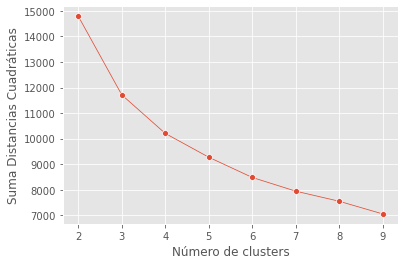

In [182]:
#x4_scaled powers ratios
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x4_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

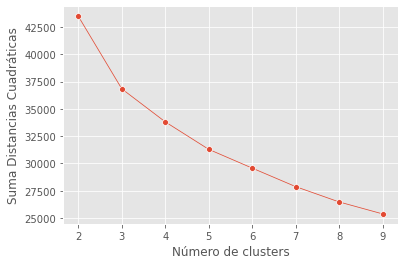

In [183]:
#x5_scaled todo
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x5_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

### Numero de clusters por silohuette score

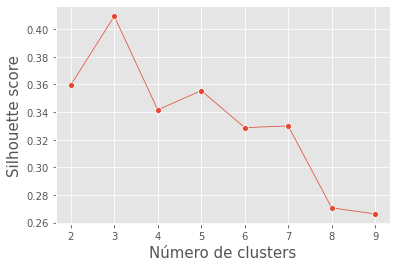

In [184]:
#x1_scaled medidas
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x1_scaled)
    score=silhouette_score(x1_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

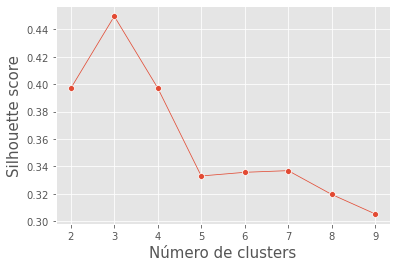

In [185]:
#x2_scaled powers
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x2_scaled)
    score=silhouette_score(x2_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

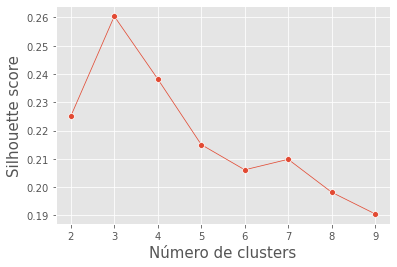

In [186]:
#x3_scaled ratios
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x3_scaled)
    score=silhouette_score(x3_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

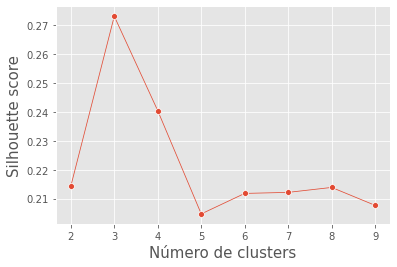

In [187]:
#x4_scaled power ratios
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x4_scaled)
    score=silhouette_score(x4_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

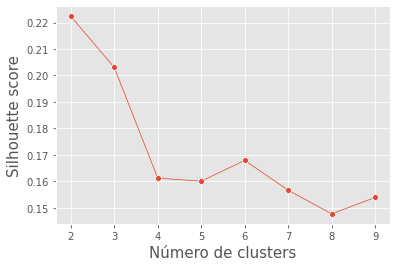

In [188]:
#x5_scaled todo
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x5_scaled)
    score=silhouette_score(x5_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

### Kmeans 

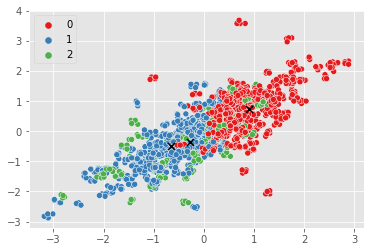

In [189]:
#x1_scaled medidas
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x1_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x1_scaled[:,0],y=x1_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

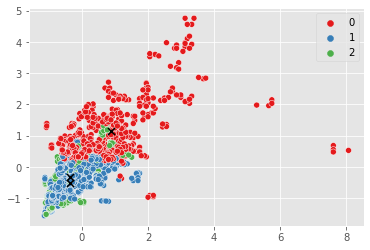

In [190]:
#x2_scaled powers
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x2_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x2_scaled[:,0],y=x2_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

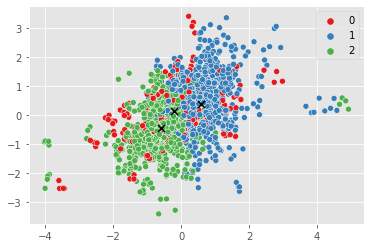

In [191]:
#x3_scaled ratios
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x3_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x3_scaled[:,0],y=x3_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

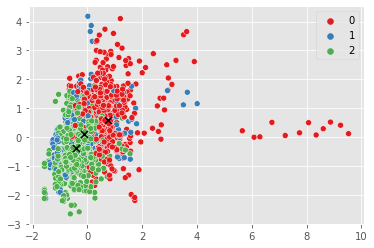

In [192]:
#x4_scaled powers ratios
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x4_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x4_scaled[:,0],y=x4_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

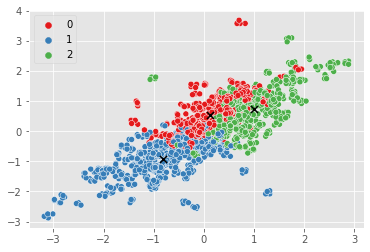

In [193]:
#x5_scaled todo
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x5_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x5_scaled[:,0],y=x5_scaled[:,1],hue=labels,legend='full', palette="Set1");

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

### Comparación True labels vs Kmeans

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

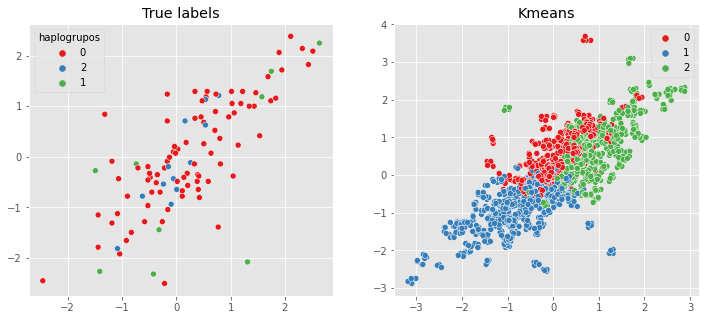

In [194]:
#x1_scaled medidas
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

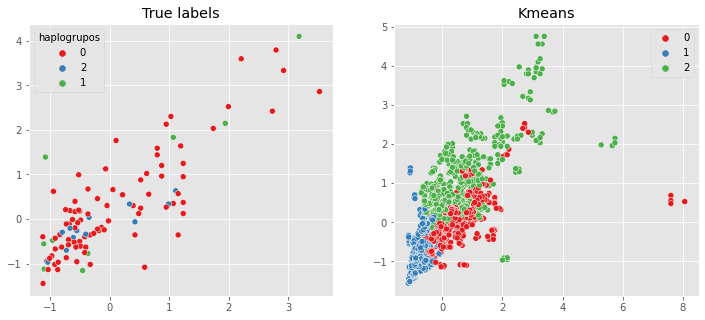

In [195]:
#x2_scaled powers
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

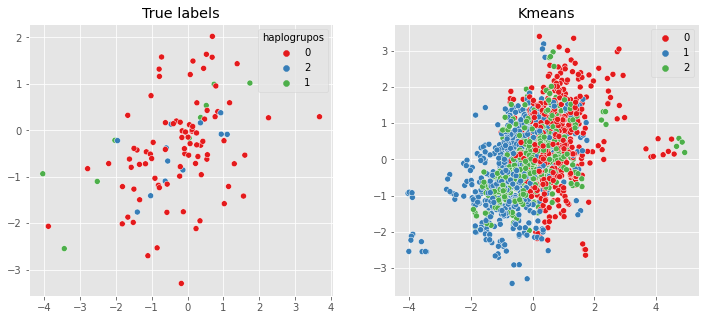

In [196]:
#x3_scaled ratios
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

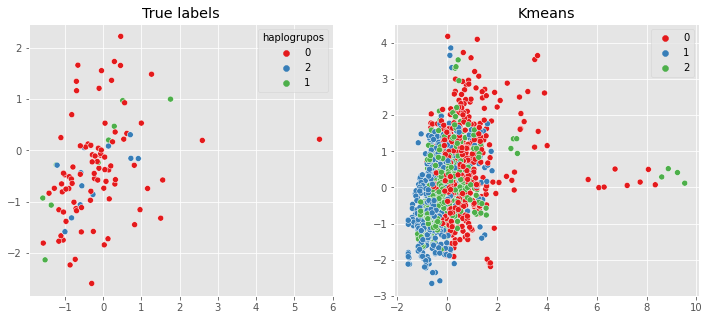

In [197]:
#x4_scaled powers ratios
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

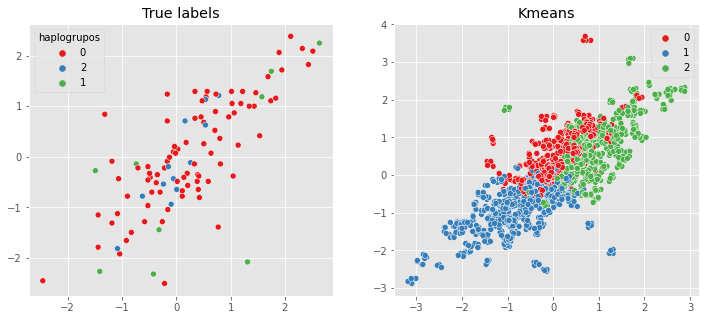

In [198]:
#x5_scaled todos
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')



<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

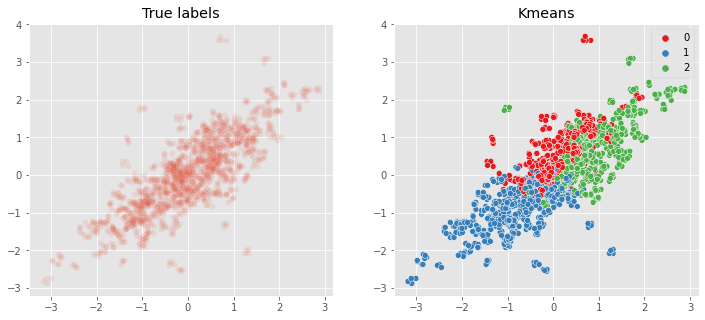

In [199]:
#x5_scaled todos (agregamos alpha)
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],ax=ax[0], alpha=0.1)
#sns.scatterplot(x = x_scaled[indices,0], y = x_scaled[indices,1],hue=y_true[y_true!="0"],ax=ax[0], palette="magma")
ax[0].set_title('True labels')
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

In [200]:
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f");

#print(classification_report(y_true,labels))

## DBSCAN

In [201]:
from scipy.spatial.distance import pdist,squareform

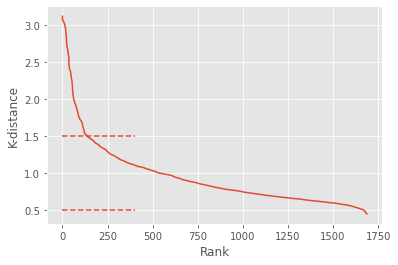

In [202]:
#x1_scaled medidas
minPts=20;
k=minPts-1;

D=squareform(pdist(x1_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([0.5,1.5],0,400,linestyles='dashed');

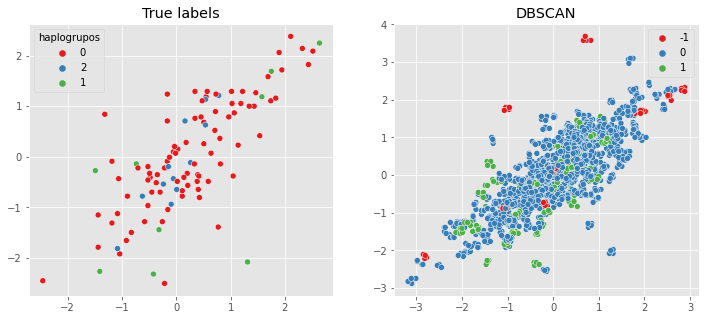

In [203]:
#x1_scaled medidas
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x1_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');


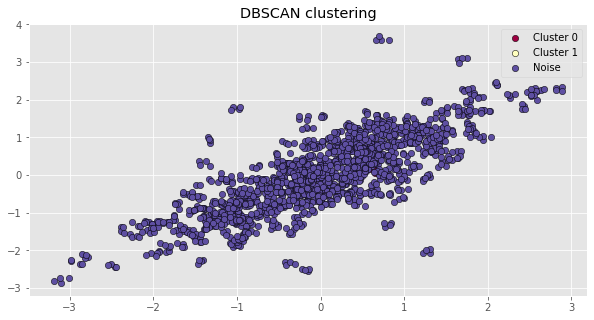

In [204]:
#x1_scaled medidas
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x1_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x1_scaled[labels==l,0], x1_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x1_scaled[labels==l,0], x1_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');
    

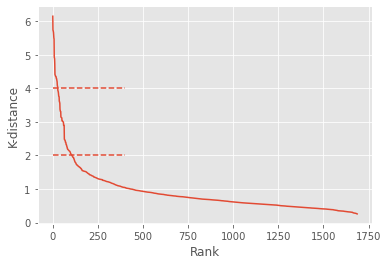

In [205]:
#x2_scaled powers
minPts=20;
k=minPts-1;

D=squareform(pdist(x2_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

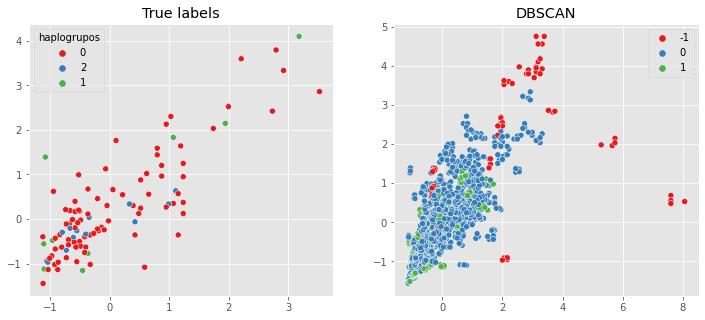

In [206]:
#x2_scaled powers
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x2_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');

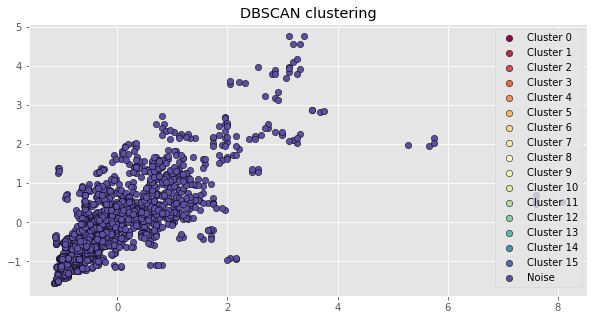

In [207]:
#x2_scaled medidas
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x2_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x2_scaled[labels==l,0], x2_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x2_scaled[labels==l,0], x2_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

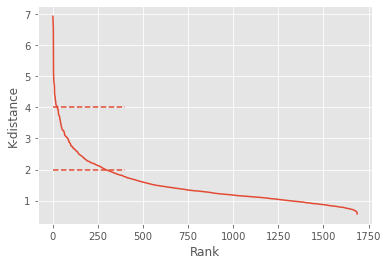

In [208]:
#x3_scaled ratios
minPts=20;
k=minPts-1;

D=squareform(pdist(x3_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

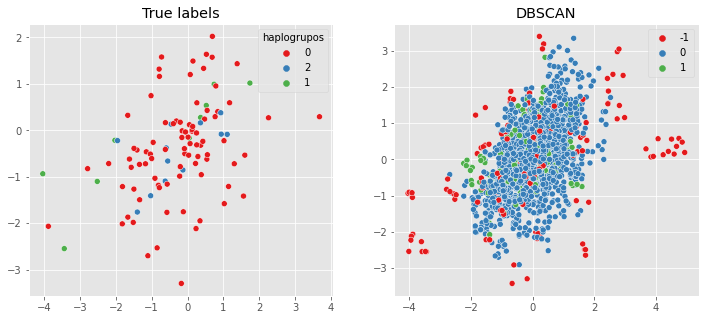

In [209]:
#x3_scaled ratios
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x3_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');

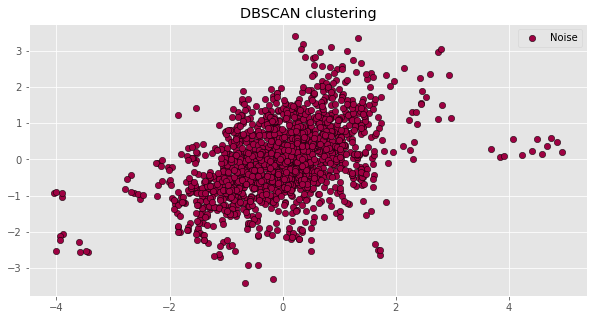

In [210]:
#x3_scaled ratios
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x3_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x3_scaled[labels==l,0], x3_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x3_scaled[labels==l,0], x3_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

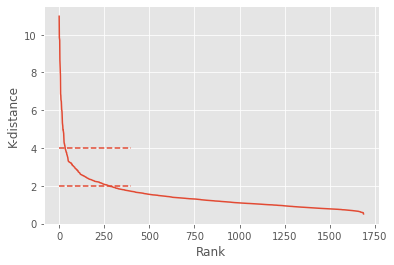

In [211]:
#x4_scaled power ratios
minPts=20;
k=minPts-1;

D=squareform(pdist(x4_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

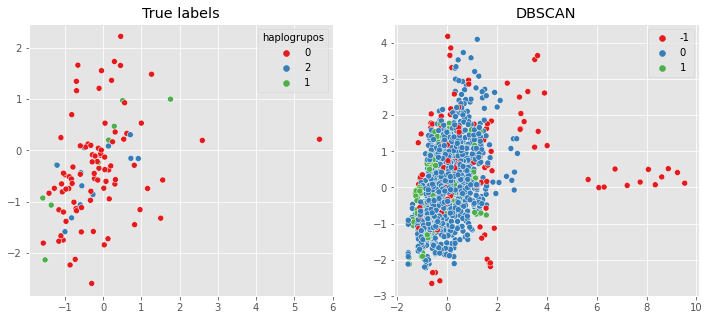

In [212]:
#x4_scaled power ratios
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x4_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');

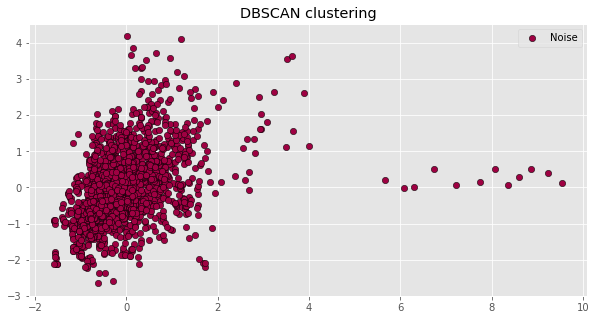

In [213]:
#x4_scaled powers ratios
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x4_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x4_scaled[labels==l,0], x4_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x4_scaled[labels==l,0], x4_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

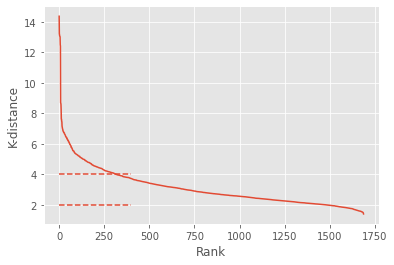

In [214]:
#x5_scaled todos
minPts=20;
k=minPts-1;

D=squareform(pdist(x5_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'DBSCAN')

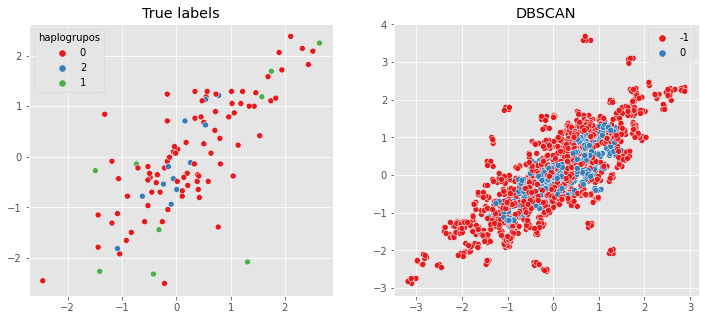

In [215]:
#x5_scaled todos
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x5_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN')

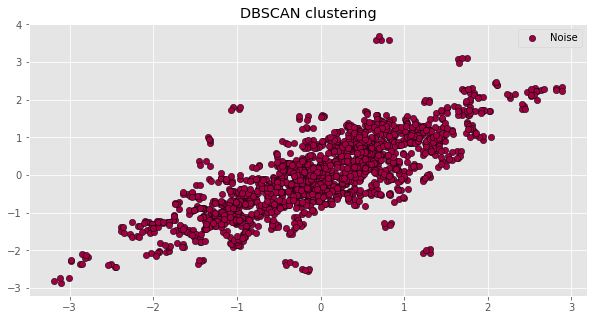

In [216]:
#x5_scaled todos
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x5_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x5_scaled[labels==l,0], x5_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x5_scaled[labels==l,0], x5_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

# Modelos reducción dimensionalidad

## Prueba PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
df_x1 = pd.DataFrame(x1_scaled)
df_x2 = pd.DataFrame(x2_scaled)
df_x3 = pd.DataFrame(x3_scaled)
df_x4 = pd.DataFrame(x4_scaled)
df_x5 = pd.DataFrame(x5_scaled)

In [16]:
pca_1 = PCA().fit(df_x1)
pca_2 = PCA().fit(df_x2)
pca_3 = PCA().fit(df_x3)
pca_4 = PCA().fit(df_x4)
pca_5 = PCA().fit(df_x5)

### Pesos (loadings)

In [220]:
#x1 medidas
#Creamos un DataFrame con los loadings.
loadings_1 = pd.DataFrame(pca_1.components_.T, index=df_x1.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_1.components_.T[0]))])
loadings_1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.401108,0.002964,-0.088953,0.050613,-0.151504,-0.795708,0.047696,0.113803,-0.396607
1,0.336554,-0.053072,-0.604906,0.585563,0.265920,0.240136,0.213225,-0.031705,-0.016443
2,0.401806,0.044061,0.225250,0.034191,-0.314269,-0.095487,0.432310,-0.262768,0.648754
3,0.409534,0.045337,0.046567,0.122126,0.019045,0.008085,-0.824665,0.138649,0.336777
4,0.391797,0.012194,0.254054,0.037390,-0.511167,0.524678,0.024623,0.086082,-0.485603
5,0.351494,0.104381,0.524742,-0.068194,0.732193,0.057296,0.158837,0.003624,-0.144640
6,0.344338,-0.084260,-0.461553,-0.793037,0.091453,0.140441,0.024735,-0.057488,0.019710
7,-0.021860,0.698766,-0.095491,0.006874,-0.015253,-0.012856,-0.160527,-0.667604,-0.173839
8,0.024047,-0.697682,0.105938,0.058879,0.034808,-0.039248,-0.181875,-0.664341,-0.144196


In [221]:
#x2 powers
#Creamos un DataFrame con los loadings.
loadings_2 = pd.DataFrame(pca_2.components_.T, index=df_x2.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_2.components_.T[0]))])
loadings_2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.322896,-0.050672,0.619972,0.612948,0.241434,0.233010,-0.141563,0.021776,-0.001399
1,0.405611,-0.002610,0.085529,0.036679,-0.162120,-0.816336,-0.203986,-0.287860,-0.098244
2,0.416037,0.035421,-0.060088,0.092648,-0.085528,-0.027791,0.886181,0.031751,0.138027
3,0.408467,0.044697,-0.239536,0.029140,-0.249415,0.010913,-0.302331,0.745911,0.250631
4,0.359498,0.080114,-0.444714,-0.081548,0.796900,0.037277,-0.103746,-0.099719,-0.052685
5,0.395103,0.009684,-0.285064,0.044126,-0.454935,0.497819,-0.185979,-0.468752,-0.226904
6,0.325316,-0.116999,0.497819,-0.774752,0.056067,0.163555,-0.019716,0.036762,-0.027979
7,-0.005783,0.698379,0.097095,-0.016798,-0.018276,-0.015957,0.075403,0.240337,-0.662184
8,0.008748,-0.697309,-0.105114,0.066309,0.020256,-0.046816,0.101011,0.265492,-0.644164


In [222]:
#x3 ratios
#Creamos un DataFrame con los loadings.
loadings_3 = pd.DataFrame(pca_3.components_.T, index=df_x3.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_3.components_.T[0]))])
loadings_3

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.376385,-0.028108,0.156474,-0.225953,0.534562,0.073327,0.010336,-0.458349,0.521433,-0.040644,-0.084483
1,0.242198,0.111639,0.148333,-0.700756,-0.287576,0.403178,0.000870,0.150030,-0.104709,-0.155710,0.335922
2,-0.219181,0.437033,-0.203860,-0.431263,0.239438,0.028547,0.016818,0.089585,-0.185569,0.305392,-0.582461
3,0.430695,0.047586,0.029088,0.008317,0.393402,-0.321331,0.001578,-0.080348,-0.706347,0.005423,0.218836
4,0.339766,0.254681,-0.147273,-0.071144,-0.465429,-0.482171,-0.008662,-0.168974,0.089832,-0.442117,-0.334168
5,-0.387550,0.123540,-0.152783,-0.286293,0.293036,-0.514066,-0.023246,0.261103,0.259953,-0.246545,0.426647
6,0.012657,-0.493869,0.283407,-0.349293,-0.238654,-0.463392,0.011202,-0.026240,0.042148,0.522436,-0.079932
7,0.467036,-0.016545,0.080670,0.137835,0.144065,-0.026975,-0.020326,0.801890,0.233824,0.057284,-0.182264
8,0.235543,0.482496,-0.277948,0.146086,-0.195691,-0.064152,0.014603,-0.108614,0.227234,0.589560,0.399354
9,-0.114547,0.346054,0.591962,0.100353,-0.022647,-0.067588,-0.707628,-0.020421,-0.003113,0.019407,-0.003759


In [223]:
#x4 powers_ratios
#Creamos un DataFrame con los loadings.
loadings_4 = pd.DataFrame(pca_4.components_.T, index=df_x4.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_4.components_.T[0]))])
loadings_4

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.349813,-0.010696,0.164267,0.555426,0.195441,0.267045,0.508952,0.404090,-0.040672,0.028464,-0.087977
1,0.256298,0.091716,0.148371,-0.289355,0.694929,0.350158,-0.277221,-0.045060,-0.167509,-0.011165,0.327959
2,-0.180986,0.468771,-0.234162,0.230675,0.396882,0.058805,-0.132632,-0.208751,0.319819,0.034220,-0.560232
3,0.437807,0.046518,0.046518,0.403211,-0.041835,-0.258207,0.005590,-0.719686,-0.049282,-0.054755,0.222691
4,0.376574,0.206934,-0.132893,-0.410242,0.100754,-0.446759,0.273099,0.067455,-0.436956,0.113759,-0.369678
5,-0.357058,0.176081,-0.192721,0.354290,0.287734,-0.520972,-0.095408,0.293147,-0.258359,-0.013089,0.403338
6,-0.018385,-0.473077,0.297163,-0.126928,0.408079,-0.460538,0.164453,-0.004607,0.504726,-0.069110,-0.078926
7,0.465966,-0.020089,0.091742,0.164134,-0.160144,-0.193388,-0.694464,0.389336,0.146124,0.029428,-0.167301
8,0.268072,0.444750,-0.283529,-0.229132,-0.123192,-0.054302,0.228621,0.172294,0.557875,-0.139172,0.408379
9,-0.118387,0.371781,0.575235,-0.036761,-0.093935,-0.071685,0.007196,0.030179,-0.105151,-0.693103,-0.095620


In [224]:
#x5 todos
#Creamos un DataFrame con los loadings.
loadings_5 = pd.DataFrame(pca_5.components_.T, index=df_x5.columns, columns = ['PC' + str(x+1) for x in range(0, len(pca_5.components_.T[0]))])
loadings_5

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,0.254003,-0.091544,-0.113496,-0.124573,-0.033906,0.013494,-0.071963,0.066844,-0.083634,0.167778,...,0.031145,0.069440,-0.056033,0.720002,-0.082373,0.242091,-0.148328,0.260124,-0.210941,0.031266
1,0.267482,0.067673,-0.021368,0.095232,0.085896,-0.011483,0.004416,0.019563,-0.206012,-0.048900,...,-0.176366,0.757845,-0.216917,-0.129715,0.063916,-0.243187,-0.104359,-0.039082,0.014024,-0.014786
2,0.227831,-0.188723,-0.054268,-0.072476,0.081493,0.041455,0.064317,0.016931,-0.058884,0.266226,...,-0.042737,-0.142165,0.012343,0.045616,-0.023149,0.147200,-0.195728,-0.507471,0.588516,-0.194981
3,0.251408,-0.134318,-0.060043,0.021599,-0.063355,0.021785,0.149836,0.021529,-0.031263,0.235123,...,-0.076597,-0.085402,-0.093693,-0.070455,-0.120824,0.004523,0.817644,0.040069,0.020242,0.085544
4,0.227077,-0.199885,0.059642,-0.024522,-0.000313,0.009625,-0.034094,0.029122,-0.082153,0.249911,...,0.161573,-0.171647,0.025047,-0.414832,-0.558025,-0.115112,-0.309803,0.108425,-0.297242,0.034580
5,0.166792,-0.239620,-0.156122,0.136611,-0.015416,-0.091507,-0.013287,-0.010098,-0.104115,0.306609,...,0.036636,-0.182580,0.248909,-0.164513,0.671967,-0.103706,-0.127297,0.150907,-0.150337,0.057005
6,0.234835,-0.022431,-0.043851,-0.091262,-0.056162,-0.056031,-0.054335,-0.634026,0.055825,-0.024067,...,-0.024724,0.027450,-0.012226,0.033203,-0.024854,0.012376,0.006823,-0.000211,0.002735,-0.003273
7,-0.028217,-0.039840,-0.117614,0.213343,-0.060537,0.633342,-0.162737,-0.051822,-0.015083,0.009428,...,0.006322,-0.008186,-0.002169,-0.001984,0.008192,0.000936,-0.000478,0.000306,-0.002225,0.001815
8,0.029987,0.040446,0.113911,-0.207146,0.057396,-0.634169,0.176927,0.092143,0.025819,0.010306,...,0.006031,-0.006608,-0.002418,-0.001837,0.007588,-0.000029,-0.000911,0.000473,-0.002137,0.001794
9,0.131178,0.217722,0.097658,0.307008,0.179981,-0.035388,0.122874,-0.058631,-0.367788,-0.124750,...,0.049825,-0.418407,-0.240327,0.300512,-0.047936,-0.459947,-0.026387,-0.084091,-0.010347,0.020013


### Explicación Varianza

In [225]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

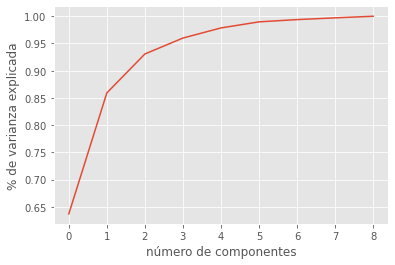

In [226]:
plot_explained_variance(components_count = 9, X = df_x1)

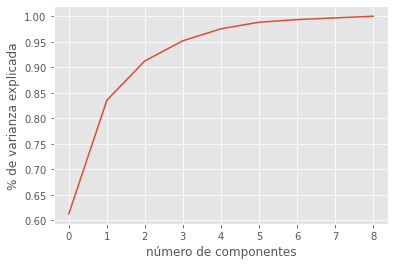

In [227]:
plot_explained_variance(components_count = 9, X = df_x2)

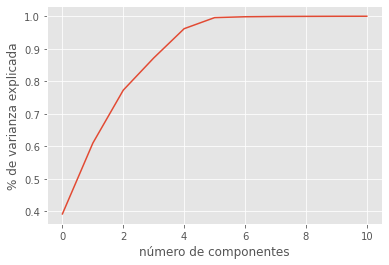

In [228]:
plot_explained_variance(components_count = 11, X = df_x3)

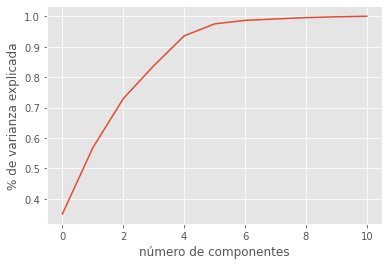

In [229]:
plot_explained_variance(components_count =11, X = df_x4)

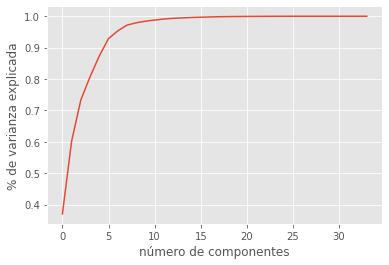

In [230]:
plot_explained_variance(components_count = 34, X = df_x5)

### Proyección - (x5 - Todos los futures)

In [231]:
#nuevo dataset con cada participación de feature
nuevo_data_pca = pd.DataFrame(pca_5.fit_transform(df_x5), index =df_x5.index,\
                              columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11','PC12','PC13',\
                                       'PC14','PC15','PC16','PC17','PC18','CP19','PC20', 'PC21', 'PC22', 'PC23','PC24', 'PC25', 'PC26', \
                                       'PC27','PC28', 'PC29','PC30','PC31','PC32','PC33','PC34'])

In [232]:
nuevo_data_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,1.879451,0.541499,0.878859,3.337913,2.732173,-1.032855,1.034464,-0.863420,-0.351436,0.295483,...,0.000865,0.032261,-0.003682,0.007996,0.006841,-0.015930,-0.001498,0.003389,0.001582,-0.003083
1,-3.493884,0.805714,-2.407458,-0.720932,0.496158,-1.065208,-0.616935,0.026867,-0.282510,-0.168332,...,0.020992,0.010050,-0.000050,0.004497,-0.014460,0.009974,0.002041,-0.005674,0.000582,0.001487
2,0.034532,-0.811380,2.485058,-0.511926,0.560611,0.151755,0.596080,-0.018333,-0.286113,0.178430,...,0.024064,-0.011284,-0.010370,-0.002061,-0.004267,-0.009571,-0.001696,-0.003441,0.000896,0.001267
3,4.204249,9.330722,-1.549989,-1.604105,-0.456248,0.003587,-1.583203,0.277241,1.370611,0.773696,...,-0.016468,-0.039251,-0.031733,-0.004166,0.013771,-0.001898,-0.008870,0.009219,-0.005241,-0.010814
4,2.097490,0.387128,1.554832,3.798904,2.198114,-1.248394,0.530772,-0.835290,-0.407061,0.336501,...,0.036363,0.037008,-0.004864,0.000882,0.006660,-0.013560,-0.002636,0.001509,-0.005865,-0.001996
5,1.666828,0.229697,0.851988,3.574419,3.114961,-1.252333,0.623407,-1.106642,-0.445254,0.290829,...,-0.001705,0.028556,-0.008644,0.005426,0.010655,-0.017181,-0.004208,0.003088,0.000557,-0.003850
6,2.081533,0.596609,1.053602,3.293592,2.151055,-1.217407,0.364177,-0.938730,-0.400474,0.233609,...,0.023996,0.037641,-0.003182,0.002799,0.007317,-0.013808,-0.002973,0.001927,-0.003691,-0.002465
7,-3.235078,0.996938,-2.585920,-1.167675,-0.214793,-0.965127,-0.582674,0.186668,-0.196203,-0.082495,...,0.022494,0.014537,-0.002287,0.006277,-0.013930,0.007208,-0.000608,-0.005684,0.000163,0.002563
8,-3.137802,0.651573,-1.915059,-1.036424,-0.567079,-0.988065,-0.695841,-0.033031,-0.116883,-0.084721,...,0.019231,0.016207,-0.003049,0.006953,-0.012285,0.006976,-0.000563,-0.005023,0.001203,0.001997
9,-3.306289,0.782124,-1.768931,-0.620220,0.115662,-1.048213,-0.737293,-0.021160,-0.279031,-0.161638,...,0.022250,0.010879,0.000730,0.004472,-0.013674,0.009995,0.001898,-0.005261,0.001758,0.001079


In [233]:
nuevo_data_pca.reset_index()

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,0,1.879451,0.541499,0.878859,3.337913,2.732173,-1.032855,1.034464,-0.863420,-0.351436,...,0.000865,0.032261,-0.003682,0.007996,0.006841,-0.015930,-0.001498,0.003389,0.001582,-0.003083
1,1,-3.493884,0.805714,-2.407458,-0.720932,0.496158,-1.065208,-0.616935,0.026867,-0.282510,...,0.020992,0.010050,-0.000050,0.004497,-0.014460,0.009974,0.002041,-0.005674,0.000582,0.001487
2,2,0.034532,-0.811380,2.485058,-0.511926,0.560611,0.151755,0.596080,-0.018333,-0.286113,...,0.024064,-0.011284,-0.010370,-0.002061,-0.004267,-0.009571,-0.001696,-0.003441,0.000896,0.001267
3,3,4.204249,9.330722,-1.549989,-1.604105,-0.456248,0.003587,-1.583203,0.277241,1.370611,...,-0.016468,-0.039251,-0.031733,-0.004166,0.013771,-0.001898,-0.008870,0.009219,-0.005241,-0.010814
4,4,2.097490,0.387128,1.554832,3.798904,2.198114,-1.248394,0.530772,-0.835290,-0.407061,...,0.036363,0.037008,-0.004864,0.000882,0.006660,-0.013560,-0.002636,0.001509,-0.005865,-0.001996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,1.800325,2.903766,3.359474,-0.706595,0.438916,0.648352,0.477688,-0.233981,0.267127,...,0.044703,0.000511,0.008507,0.000170,0.001820,-0.007697,0.003811,0.003135,0.002261,0.003910
1684,1684,1.737150,3.175270,2.223688,-1.386800,-0.069304,0.666460,0.560703,-0.114556,0.267419,...,0.011234,-0.001505,0.003148,0.001188,0.005217,-0.004785,0.004173,-0.001017,-0.003059,-0.003089
1685,1685,-1.754656,-2.950722,2.320172,-0.343017,0.643993,-0.282199,0.738502,-1.717274,0.334746,...,0.004193,-0.056590,-0.007518,-0.013665,0.007022,-0.007843,0.001228,-0.005663,0.000558,-0.000704
1686,1686,-1.468703,-2.897121,2.816331,-0.137666,0.360168,-0.269447,0.676940,-1.546819,0.261414,...,0.016259,-0.060081,-0.010891,-0.016812,0.005603,-0.010442,0.001557,-0.008973,-0.003100,0.002307


In [234]:
data.reset_index()

,index,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,...,Power_NV,Power_Ratio_LE_AE,Power_Ratio_LT_AT,Power_Ratio_LA_AA,Power_Ratio_LE_LT,Power_Ratio_AE_AT,Power_Ratio_LA_LT,Power_Ratio_AA_AT,Power_Ratio_LE_LA,Power_Ratio_AE_AA
0,0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,...,777.205187,0.018097,0.312515,0.547826,0.002042,0.035268,0.193792,0.110551,0.010539,0.319022
1,1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,...,610.134461,0.004648,0.259414,0.711718,0.000984,0.054918,0.248472,0.090566,0.003960,0.606388
2,2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,...,681.841766,0.006906,0.272619,0.303272,0.001001,0.039531,0.141263,0.126985,0.007089,0.311305
3,3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,...,875.781161,0.012346,0.380882,0.324194,0.003172,0.097870,0.081302,0.095518,0.039018,1.024614
4,4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,...,783.109853,0.018545,0.326245,0.519637,0.002079,0.036576,0.201706,0.126638,0.010308,0.288824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,554,25,6.12,1.96,12.97,9.71,7.76,5.23,5.25,...,759.691406,0.010520,0.314135,0.206329,0.001660,0.049573,0.084165,0.128141,0.019725,0.386864
1684,1684,554,26,6.29,1.93,12.96,9.76,7.58,5.23,5.26,...,765.496090,0.008864,0.321647,0.226637,0.001529,0.055486,0.082453,0.117019,0.018545,0.474161
1685,1685,554,27,5.59,1.47,13.51,9.58,8.04,6.33,5.34,...,813.139443,0.004782,0.252837,0.384229,0.000554,0.029311,0.190613,0.125430,0.002908,0.233681
1686,1686,554,28,5.61,1.50,13.52,9.68,8.18,6.33,5.32,...,801.025846,0.005111,0.262781,0.358593,0.000577,0.029645,0.182858,0.134001,0.003153,0.221227


In [235]:
pca_haplo= pd.concat([nuevo_data_pca, data["haplogrupos"]], axis=1)

In [236]:
pca_haplo.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,haplogrupos
0,1.879451,0.541499,0.878859,3.337913,2.732173,-1.032855,1.034464,-0.863420,-0.351436,0.295483,...,0.032261,-0.003682,0.007996,0.006841,-0.015930,-0.001498,0.003389,0.001582,-0.003083,0
1,-3.493884,0.805714,-2.407458,-0.720932,0.496158,-1.065208,-0.616935,0.026867,-0.282510,-0.168332,...,0.010050,-0.000050,0.004497,-0.014460,0.009974,0.002041,-0.005674,0.000582,0.001487,2
2,0.034532,-0.811380,2.485058,-0.511926,0.560611,0.151755,0.596080,-0.018333,-0.286113,0.178430,...,-0.011284,-0.010370,-0.002061,-0.004267,-0.009571,-0.001696,-0.003441,0.000896,0.001267,NaN
3,4.204249,9.330722,-1.549989,-1.604105,-0.456248,0.003587,-1.583203,0.277241,1.370611,0.773696,...,-0.039251,-0.031733,-0.004166,0.013771,-0.001898,-0.008870,0.009219,-0.005241,-0.010814,NaN
4,2.097490,0.387128,1.554832,3.798904,2.198114,-1.248394,0.530772,-0.835290,-0.407061,0.336501,...,0.037008,-0.004864,0.000882,0.006660,-0.013560,-0.002636,0.001509,-0.005865,-0.001996,NaN


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

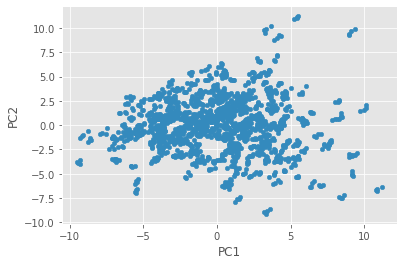

In [237]:
pca_haplo.plot(x="PC1", y="PC2", kind ="scatter")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

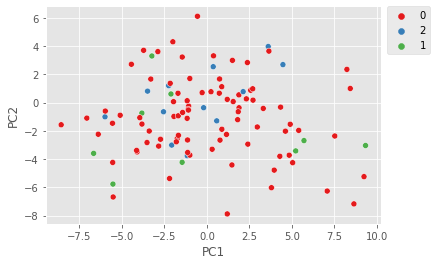

In [238]:
sns.scatterplot(data=pca_haplo,x="PC1", y="PC2",hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

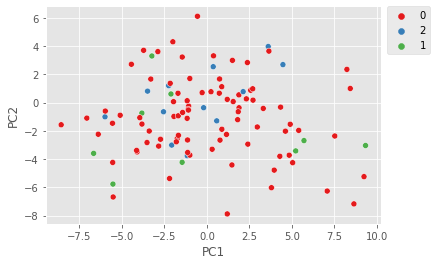

In [239]:
sns.scatterplot(data=pca_haplo,x=pca_haplo.PC1, y=pca_haplo.PC2,hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [240]:
pca_5.explained_variance_ratio_

array([3.70213849e-01, 2.32283588e-01, 1.30964136e-01, 7.38963378e-02,
       6.61507528e-02, 5.53478832e-02, 2.44482716e-02, 1.84468979e-02,
       7.36983641e-03, 5.04681899e-03, 3.63046376e-03, 3.42268560e-03,
       2.08024091e-03, 1.45949548e-03, 1.29842474e-03, 8.77983390e-04,
       8.35753327e-04, 7.05679134e-04, 3.68430504e-04, 2.86383605e-04,
       2.29947693e-04, 2.14834401e-04, 1.63564729e-04, 1.34301329e-04,
       6.02276401e-05, 2.91482480e-05, 1.44292140e-05, 6.30058106e-06,
       5.29583036e-06, 3.45797090e-06, 1.60849340e-06, 1.29052300e-06,
       1.00719865e-06, 6.73832881e-07])

### Bastón quebrado

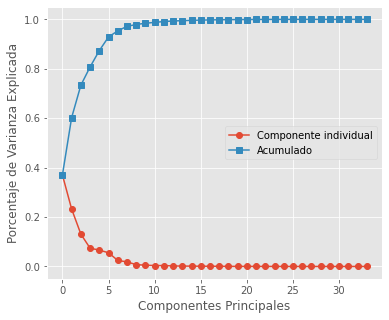

In [241]:
plt.figure(figsize=(6,5))

plt.plot(pca_5.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(pca_5.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

## Prueba TSNE (x5 - Todas las Futures)

In [242]:
from sklearn.manifold import TSNE

In [243]:
tsne = TSNE(random_state=42)

proj_tsne = tsne.fit_transform(df_x5)

In [244]:
df_x5.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.165818,1.238365,0.391905,0.495167,0.321955,0.760541,0.454609,-0.391159,0.403156,2.256107,...,0.393611,2.593865,0.196046,0.366347,1.287535,-1.227032,0.244204,-0.163913,0.386974,-0.891833
1,-0.624470,-0.779665,-0.843994,-1.029964,-1.064153,-0.442926,-0.584837,-0.391159,0.403156,-0.554716,...,-0.652027,-0.555070,-0.687849,1.222511,-0.266685,0.404190,1.114621,-1.023355,-0.599501,0.942224
2,-0.104664,0.016926,0.258016,0.119107,0.427331,-0.180352,-0.115410,-0.391159,0.403156,0.168034,...,-0.203236,-0.026344,-0.468042,-0.911200,-0.241029,-0.873159,-0.591961,0.542784,-0.130316,-0.941083
3,0.364181,1.158706,-0.756451,-0.354450,-0.918247,-1.438522,0.991097,-0.391159,0.403156,1.366566,...,1.010564,1.247298,1.334049,-0.801902,2.946920,3.969806,-1.546420,-0.810370,4.657496,3.611463
4,-0.176010,1.264918,0.314661,0.495167,0.475967,0.837125,0.488139,-0.391159,0.403156,2.315999,...,0.430566,2.698876,0.424586,0.219086,1.341693,-1.118462,0.370191,0.527867,0.352384,-1.084563


In [245]:
df_tsne= pd.DataFrame(proj_tsne)

In [246]:
df_tsne.head()

,0,1
0,-24.221655,-1.935863
1,28.720104,-0.214968
2,-2.075243,-3.181887
3,-21.076075,-47.128918
4,-24.294117,-2.193568


In [247]:
tsne_haplo= pd.concat([df_tsne, data["haplogrupos"]], axis=1)

In [248]:
tsne_haplo.columns = ["X","Y","haplogrupos"]

In [249]:
tsne_haplo.head()

,X,Y,haplogrupos
0,-24.221655,-1.935863,0
1,28.720104,-0.214968,2
2,-2.075243,-3.181887,NaN
3,-21.076075,-47.128918,NaN
4,-24.294117,-2.193568,NaN


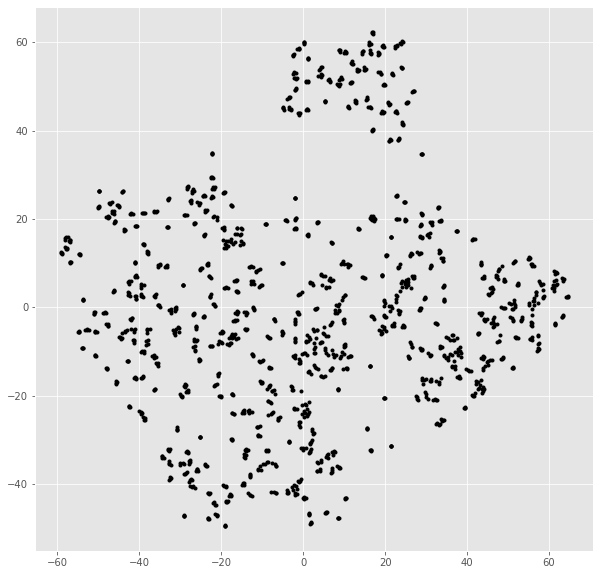

In [250]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne[:, 0]
coord_y = proj_tsne[:, 1]
ax.plot(coord_x, coord_y, '.k')    

<AxesSubplot:xlabel='X', ylabel='Y'>

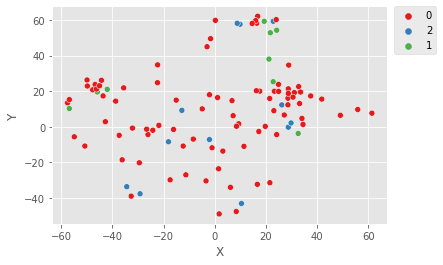

In [251]:
sns.scatterplot(data=tsne_haplo,x="X", y="Y",hue="haplogrupos",palette="Set1" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Modelos clasificación  (x5 - Todas las Futures)

In [252]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import accuracy_score

## CART

### CART (x5 - Todas las Futures)

In [253]:
pca_haplo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          1688 non-null   float64
 1   PC2          1688 non-null   float64
 2   PC3          1688 non-null   float64
 3   PC4          1688 non-null   float64
 4   PC5          1688 non-null   float64
 5   PC6          1688 non-null   float64
 6   PC7          1688 non-null   float64
 7   PC8          1688 non-null   float64
 8   PC9          1688 non-null   float64
 9   PC10         1688 non-null   float64
 10  PC11         1688 non-null   float64
 11  PC12         1688 non-null   float64
 12  PC13         1688 non-null   float64
 13  PC14         1688 non-null   float64
 14  PC15         1688 non-null   float64
 15  PC16         1688 non-null   float64
 16  PC17         1688 non-null   float64
 17  PC18         1688 non-null   float64
 18  CP19         1688 non-null   float64
 19  PC20  

In [254]:
nuevo_pca_haplo = pca_haplo.dropna()

In [255]:
nuevo_pca_haplo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 1664
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          106 non-null    float64
 1   PC2          106 non-null    float64
 2   PC3          106 non-null    float64
 3   PC4          106 non-null    float64
 4   PC5          106 non-null    float64
 5   PC6          106 non-null    float64
 6   PC7          106 non-null    float64
 7   PC8          106 non-null    float64
 8   PC9          106 non-null    float64
 9   PC10         106 non-null    float64
 10  PC11         106 non-null    float64
 11  PC12         106 non-null    float64
 12  PC13         106 non-null    float64
 13  PC14         106 non-null    float64
 14  PC15         106 non-null    float64
 15  PC16         106 non-null    float64
 16  PC17         106 non-null    float64
 17  PC18         106 non-null    float64
 18  CP19         106 non-null    float64
 19  PC20   

In [256]:
X_PCA = nuevo_pca_haplo[['PC1', 'PC2', 'PC3', 'PC4','PC5']]
y_PCA = nuevo_pca_haplo['haplogrupos']

In [257]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y_PCA,stratify = nuevo_pca_haplo['haplogrupos'],random_state=0)

In [258]:
clf_dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
clf_dt = clf_dt.fit(X_train_PCA,y_train_PCA)

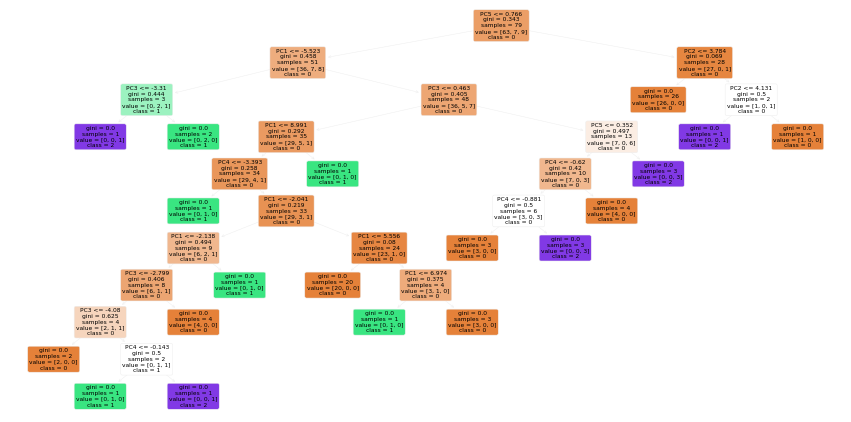

In [259]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0","1", "2"], 
          feature_names=X_train_PCA.columns); 

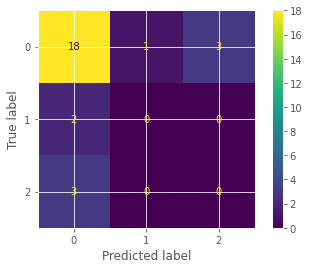

In [260]:
plot_confusion_matrix(clf_dt, X_test_PCA, y_test_PCA, display_labels=["0","1","2"])

In [261]:
accuracy_score(y_test_PCA, clf_dt.predict(X_test_PCA))

0.6666666666666666

### CART (x4 - powers ratios)

In [266]:
#nuevo dataset con cada participación de feature
nuevo_data_pca_x4 = pd.DataFrame(pca_4.fit_transform(df_x4), index =df_x4.index,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11'])

In [267]:
nuevo_data_pca_x4.reset_index()

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0,0.945468,-0.609759,0.327913,2.894897,0.740406,0.983091,0.349853,0.019754,-0.133462,0.010586,0.047327
1,1,-0.866730,1.404817,-1.843706,0.138591,-0.088334,-0.410902,0.195465,0.028033,0.000677,-0.005486,-0.061373
2,2,-0.414734,-1.732461,0.317644,0.115952,-0.503915,0.425177,0.001907,-0.076738,0.066124,-0.022611,-0.022045
3,3,7.509378,2.021548,-0.796347,-0.797931,-0.759113,-1.636742,-0.939138,0.741146,0.277130,-0.013043,0.095262
4,4,1.006538,-1.024070,0.634407,2.825734,1.217809,0.652940,0.471131,0.038049,-0.069185,-0.008284,0.090761
...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,2.223305,-1.705164,0.839020,0.189424,-0.619849,0.299125,-0.569468,0.253923,0.147859,0.015401,-0.169461
1684,1684,2.286496,-1.074391,0.383773,-0.422285,-0.752438,0.314422,-0.508351,0.262397,0.022228,0.023638,-0.094200
1685,1685,-2.060664,-1.802997,0.081990,0.413429,-0.359921,0.520150,-0.215233,-0.034746,0.075167,-0.034351,0.068923
1686,1686,-1.909245,-2.076341,0.307607,0.312917,-0.162774,0.461805,-0.167684,-0.042015,0.166688,-0.048935,0.070999


In [268]:
data.reset_index()

,index,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,...,Power_NV,Power_Ratio_LE_AE,Power_Ratio_LT_AT,Power_Ratio_LA_AA,Power_Ratio_LE_LT,Power_Ratio_AE_AT,Power_Ratio_LA_LT,Power_Ratio_AA_AT,Power_Ratio_LE_LA,Power_Ratio_AE_AA
0,0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,...,777.205187,0.018097,0.312515,0.547826,0.002042,0.035268,0.193792,0.110551,0.010539,0.319022
1,1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,...,610.134461,0.004648,0.259414,0.711718,0.000984,0.054918,0.248472,0.090566,0.003960,0.606388
2,2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,...,681.841766,0.006906,0.272619,0.303272,0.001001,0.039531,0.141263,0.126985,0.007089,0.311305
3,3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,...,875.781161,0.012346,0.380882,0.324194,0.003172,0.097870,0.081302,0.095518,0.039018,1.024614
4,4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,...,783.109853,0.018545,0.326245,0.519637,0.002079,0.036576,0.201706,0.126638,0.010308,0.288824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,554,25,6.12,1.96,12.97,9.71,7.76,5.23,5.25,...,759.691406,0.010520,0.314135,0.206329,0.001660,0.049573,0.084165,0.128141,0.019725,0.386864
1684,1684,554,26,6.29,1.93,12.96,9.76,7.58,5.23,5.26,...,765.496090,0.008864,0.321647,0.226637,0.001529,0.055486,0.082453,0.117019,0.018545,0.474161
1685,1685,554,27,5.59,1.47,13.51,9.58,8.04,6.33,5.34,...,813.139443,0.004782,0.252837,0.384229,0.000554,0.029311,0.190613,0.125430,0.002908,0.233681
1686,1686,554,28,5.61,1.50,13.52,9.68,8.18,6.33,5.32,...,801.025846,0.005111,0.262781,0.358593,0.000577,0.029645,0.182858,0.134001,0.003153,0.221227


In [270]:
pca_haplo_x4= pd.concat([nuevo_data_pca_x4, data["haplogrupos"]], axis=1)

In [271]:
pca_haplo_x4.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,haplogrupos
0,0.945468,-0.609759,0.327913,2.894897,0.740406,0.983091,0.349853,0.019754,-0.133462,0.010586,0.047327,0
1,-0.866730,1.404817,-1.843706,0.138591,-0.088334,-0.410902,0.195465,0.028033,0.000677,-0.005486,-0.061373,2
2,-0.414734,-1.732461,0.317644,0.115952,-0.503915,0.425177,0.001907,-0.076738,0.066124,-0.022611,-0.022045,NaN
3,7.509378,2.021548,-0.796347,-0.797931,-0.759113,-1.636742,-0.939138,0.741146,0.277130,-0.013043,0.095262,NaN
4,1.006538,-1.024070,0.634407,2.825734,1.217809,0.652940,0.471131,0.038049,-0.069185,-0.008284,0.090761,NaN


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

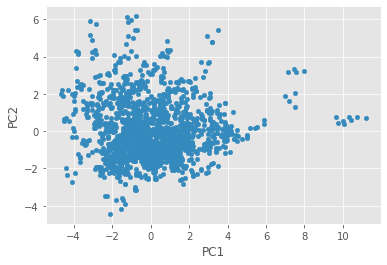

In [272]:
pca_haplo_x4.plot(x="PC1", y="PC2", kind ="scatter")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

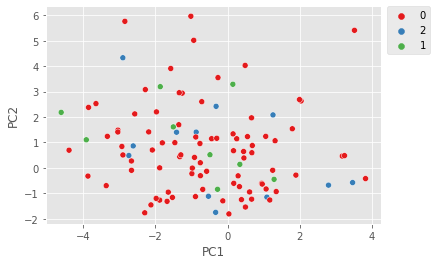

In [273]:
sns.scatterplot(data=pca_haplo_x4,x="PC1", y="PC2",hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

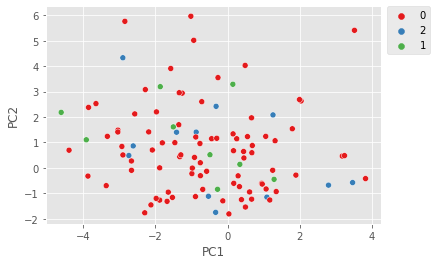

In [274]:
sns.scatterplot(data=pca_haplo_x4,x=pca_haplo_x4.PC1, y=pca_haplo_x4.PC2,hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [275]:
pca_4.explained_variance_ratio_

array([0.35067269, 0.21746512, 0.16128571, 0.10788445, 0.09816497,
       0.0393965 , 0.01154897, 0.00467711, 0.00432097, 0.00267022,
       0.00191328])

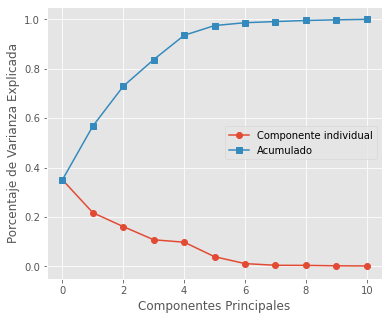

In [276]:
plt.figure(figsize=(6,5))

plt.plot(pca_4.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(pca_4.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

In [277]:
## Prueba TSNE - (x4 - solo Powers Ratios)

In [285]:
tsne = TSNE(random_state=42)

proj_tsne_x4 = tsne.fit_transform(df_x4)

In [286]:
df_x4.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.593865,0.196046,0.366347,1.287535,-1.227032,0.244204,-0.163913,0.386974,-0.891833,-0.391159,0.403156
1,-0.555070,-0.687849,1.222511,-0.266685,0.404190,1.114621,-1.023355,-0.599501,0.942224,-0.391159,0.403156
2,-0.026344,-0.468042,-0.911200,-0.241029,-0.873159,-0.591961,0.542784,-0.130316,-0.941083,-0.391159,0.403156
3,1.247298,1.334049,-0.801902,2.946920,3.969806,-1.546420,-0.810370,4.657496,3.611463,-0.391159,0.403156
4,2.698876,0.424586,0.219086,1.341693,-1.118462,0.370191,0.527867,0.352384,-1.084563,-0.391159,0.403156


In [287]:
df_tsne_x4= pd.DataFrame(proj_tsne_x4)

In [288]:
df_tsne_x4.head()

,0,1
0,-11.893164,10.720381
1,9.077359,30.481663
2,17.679892,-30.123726
3,-42.478466,-17.042339
4,-11.646595,10.933705


In [289]:
tsne_haplo_x4= pd.concat([df_tsne_x4, data["haplogrupos"]], axis=1)

In [290]:
tsne_haplo_x4.columns = ["X","Y","haplogrupos"]

In [291]:
tsne_haplo_x4.head()

,X,Y,haplogrupos
0,-11.893164,10.720381,0
1,9.077359,30.481663,2
2,17.679892,-30.123726,NaN
3,-42.478466,-17.042339,NaN
4,-11.646595,10.933705,NaN


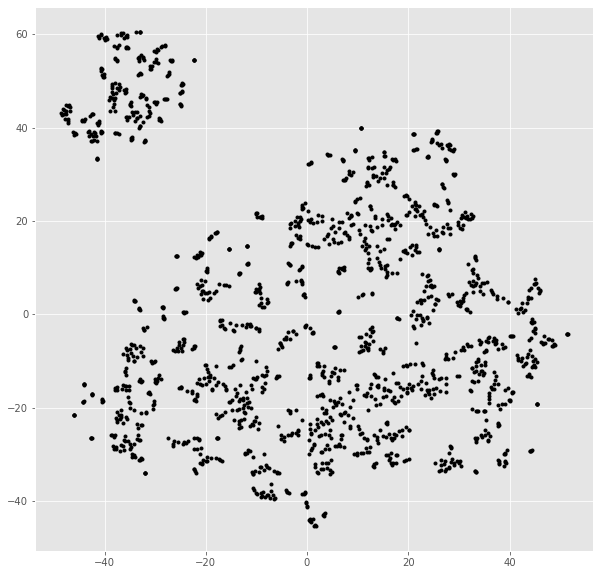

In [292]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne_x4[:, 0]
coord_y = proj_tsne_x4[:, 1]
ax.plot(coord_x, coord_y, '.k')    

<AxesSubplot:xlabel='X', ylabel='Y'>

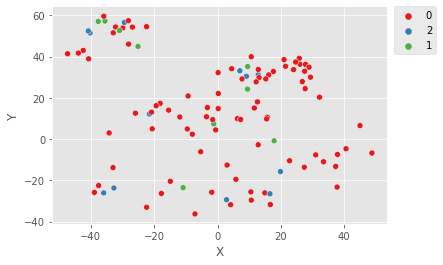

In [293]:
sns.scatterplot(data=tsne_haplo_x4,x="X", y="Y",hue="haplogrupos",palette="Set1" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## CART - (x4 - solo Powers Ratios)

In [297]:
pca_haplo_x4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          1688 non-null   float64
 1   PC2          1688 non-null   float64
 2   PC3          1688 non-null   float64
 3   PC4          1688 non-null   float64
 4   PC5          1688 non-null   float64
 5   PC6          1688 non-null   float64
 6   PC7          1688 non-null   float64
 7   PC8          1688 non-null   float64
 8   PC9          1688 non-null   float64
 9   PC10         1688 non-null   float64
 10  PC11         1688 non-null   float64
 11  haplogrupos  106 non-null    object 
dtypes: float64(11), object(1)
memory usage: 158.4+ KB


In [298]:
nuevo_pca_haplo_x4 = pca_haplo_x4.dropna()

In [299]:
nuevo_pca_haplo_x4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 1664
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          106 non-null    float64
 1   PC2          106 non-null    float64
 2   PC3          106 non-null    float64
 3   PC4          106 non-null    float64
 4   PC5          106 non-null    float64
 5   PC6          106 non-null    float64
 6   PC7          106 non-null    float64
 7   PC8          106 non-null    float64
 8   PC9          106 non-null    float64
 9   PC10         106 non-null    float64
 10  PC11         106 non-null    float64
 11  haplogrupos  106 non-null    object 
dtypes: float64(11), object(1)
memory usage: 10.8+ KB


In [300]:
X_PCA = nuevo_pca_haplo_x4[['PC1', 'PC2', 'PC3', 'PC4','PC5']]
y_PCA = nuevo_pca_haplo_x4['haplogrupos']

In [301]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y_PCA,stratify = nuevo_pca_haplo_x4['haplogrupos'],random_state=0)

In [302]:
clf_dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
clf_dt = clf_dt.fit(X_train_PCA,y_train_PCA)

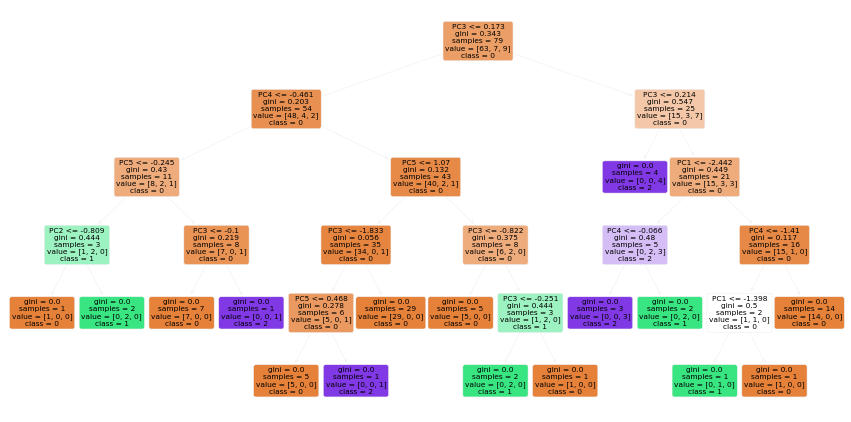

In [303]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0","1", "2"], 
          feature_names=X_train_PCA.columns); 

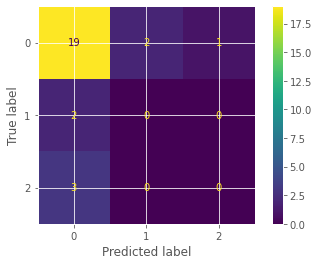

In [304]:
plot_confusion_matrix(clf_dt, X_test_PCA, y_test_PCA, display_labels=["0","1","2"])

In [305]:
accuracy_score(y_test_PCA, clf_dt.predict(X_test_PCA))

0.7037037037037037

### Proyección - (x3 - ratios)

In [307]:
#nuevo dataset con cada participación de feature
nuevo_data_pca_x3 = pd.DataFrame(pca_3.fit_transform(df_x3), index =df_x3.index,\
                              columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11'])

In [308]:
nuevo_data_pca_x3.reset_index()

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0,0.981712,-0.703095,0.268571,-1.019836,2.795334,0.429094,0.000849,-0.090650,0.047909,-0.043579,-0.003899
1,1,-0.948894,1.486971,-1.785255,0.018369,0.267480,-0.571309,-0.009656,-0.045599,0.011114,0.011679,-0.006059
2,2,0.009272,-1.822525,0.359822,0.486914,0.252941,0.378832,-0.012847,-0.032539,-0.021448,0.010474,-0.010299
3,3,5.962052,1.798045,-0.728177,0.530685,-0.879324,-0.401397,-0.009847,0.329496,0.122547,0.034559,0.058605
4,4,1.034625,-1.156031,0.566815,-1.452277,2.602516,0.078575,-0.000446,-0.106069,0.060773,-0.020302,0.009984
...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,2.817759,-1.802415,0.854743,0.799924,-0.060918,0.575565,-0.013911,0.180964,0.045701,0.019610,-0.059910
1684,1684,2.861165,-1.067924,0.404849,0.920424,-0.557417,0.636057,-0.011425,0.165588,0.046157,-0.009458,-0.028184
1685,1685,-2.278751,-2.124665,0.185925,0.229183,0.539532,0.696120,-0.013286,0.009987,-0.033356,0.002292,0.019164
1686,1686,-2.049339,-2.420016,0.423843,0.053265,0.432928,0.651702,-0.012067,-0.000971,-0.029234,0.030263,0.020668


In [309]:
data.reset_index()

,index,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,...,Power_NV,Power_Ratio_LE_AE,Power_Ratio_LT_AT,Power_Ratio_LA_AA,Power_Ratio_LE_LT,Power_Ratio_AE_AT,Power_Ratio_LA_LT,Power_Ratio_AA_AT,Power_Ratio_LE_LA,Power_Ratio_AE_AA
0,0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,...,777.205187,0.018097,0.312515,0.547826,0.002042,0.035268,0.193792,0.110551,0.010539,0.319022
1,1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,...,610.134461,0.004648,0.259414,0.711718,0.000984,0.054918,0.248472,0.090566,0.003960,0.606388
2,2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,...,681.841766,0.006906,0.272619,0.303272,0.001001,0.039531,0.141263,0.126985,0.007089,0.311305
3,3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,...,875.781161,0.012346,0.380882,0.324194,0.003172,0.097870,0.081302,0.095518,0.039018,1.024614
4,4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,...,783.109853,0.018545,0.326245,0.519637,0.002079,0.036576,0.201706,0.126638,0.010308,0.288824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,554,25,6.12,1.96,12.97,9.71,7.76,5.23,5.25,...,759.691406,0.010520,0.314135,0.206329,0.001660,0.049573,0.084165,0.128141,0.019725,0.386864
1684,1684,554,26,6.29,1.93,12.96,9.76,7.58,5.23,5.26,...,765.496090,0.008864,0.321647,0.226637,0.001529,0.055486,0.082453,0.117019,0.018545,0.474161
1685,1685,554,27,5.59,1.47,13.51,9.58,8.04,6.33,5.34,...,813.139443,0.004782,0.252837,0.384229,0.000554,0.029311,0.190613,0.125430,0.002908,0.233681
1686,1686,554,28,5.61,1.50,13.52,9.68,8.18,6.33,5.32,...,801.025846,0.005111,0.262781,0.358593,0.000577,0.029645,0.182858,0.134001,0.003153,0.221227


In [310]:
pca_haplo_x3= pd.concat([nuevo_data_pca_x3, data["haplogrupos"]], axis=1)

In [311]:
pca_haplo_x3.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,haplogrupos
0,0.981712,-0.703095,0.268571,-1.019836,2.795334,0.429094,0.000849,-0.090650,0.047909,-0.043579,-0.003899,0
1,-0.948894,1.486971,-1.785255,0.018369,0.267480,-0.571309,-0.009656,-0.045599,0.011114,0.011679,-0.006059,2
2,0.009272,-1.822525,0.359822,0.486914,0.252941,0.378832,-0.012847,-0.032539,-0.021448,0.010474,-0.010299,NaN
3,5.962052,1.798045,-0.728177,0.530685,-0.879324,-0.401397,-0.009847,0.329496,0.122547,0.034559,0.058605,NaN
4,1.034625,-1.156031,0.566815,-1.452277,2.602516,0.078575,-0.000446,-0.106069,0.060773,-0.020302,0.009984,NaN


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

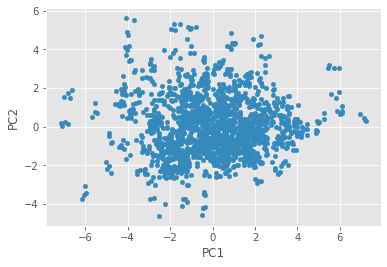

In [312]:
pca_haplo_x3.plot(x="PC1", y="PC2", kind ="scatter")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

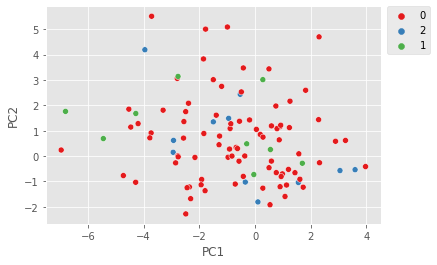

In [313]:
sns.scatterplot(data=pca_haplo_x3,x="PC1", y="PC2",hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

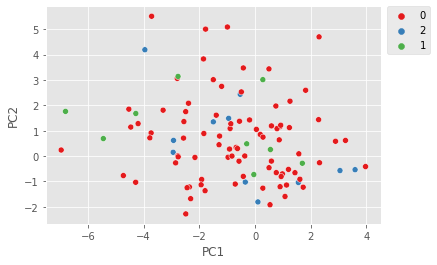

In [314]:
sns.scatterplot(data=pca_haplo_x3,x=pca_haplo_x3.PC1, y=pca_haplo_x3.PC2,hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [315]:
pca_3.explained_variance_ratio_

array([3.91625655e-01, 2.17978526e-01, 1.63000644e-01, 9.89898637e-02,
       9.01444436e-02, 3.39964209e-02, 2.69499496e-03, 8.82840067e-04,
       3.05715941e-04, 2.70429976e-04, 1.10466357e-04])

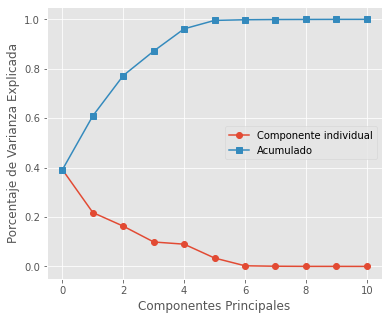

In [316]:
plt.figure(figsize=(6,5))

plt.plot(pca_3.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(pca_3.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

In [317]:
## Prueba TSNE - (x3 - solo Ratios)

In [323]:
tsne = TSNE(random_state=42)

proj_tsne_x3  = tsne.fit_transform(df_x3)

In [324]:
df_x3.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.256107,0.269761,0.516143,1.322856,-1.280251,0.380014,-0.092006,0.679067,-0.912693,-0.391159,0.403156
1,-0.554716,-0.660628,1.262376,-0.106359,0.474539,1.176758,-1.049702,-0.587305,0.988954,-0.391159,0.403156
2,0.168034,-0.416794,-1.000452,-0.074893,-0.846540,-0.564496,0.602295,0.128477,-0.979323,-0.391159,0.403156
3,1.366566,1.306771,-0.840354,2.319632,3.076478,-2.045869,-0.798635,2.937666,2.785311,-0.391159,0.403156
4,2.315999,0.490792,0.371351,1.361262,-1.143191,0.505009,0.588356,0.646876,-1.180774,-0.391159,0.403156


In [325]:
df_tsne_x3= pd.DataFrame(proj_tsne_x4)

In [326]:
df_tsne_x3.head()

,0,1
0,-11.893164,10.720381
1,9.077359,30.481663
2,17.679892,-30.123726
3,-42.478466,-17.042339
4,-11.646595,10.933705


In [327]:
tsne_haplo_x3= pd.concat([df_tsne_x3, data["haplogrupos"]], axis=1)

In [328]:
tsne_haplo_x3.columns = ["X","Y","haplogrupos"]

In [329]:
tsne_haplo_x3.head()

,X,Y,haplogrupos
0,-11.893164,10.720381,0
1,9.077359,30.481663,2
2,17.679892,-30.123726,NaN
3,-42.478466,-17.042339,NaN
4,-11.646595,10.933705,NaN


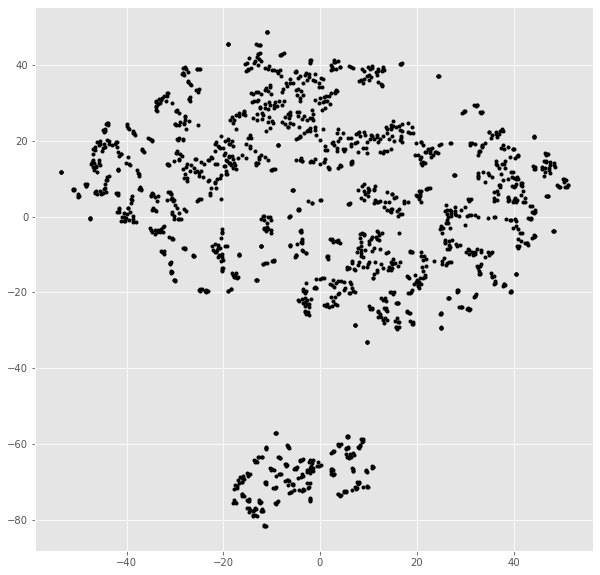

In [330]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne_x3[:, 0]
coord_y = proj_tsne_x3[:, 1]
ax.plot(coord_x, coord_y, '.k')    

<AxesSubplot:xlabel='X', ylabel='Y'>

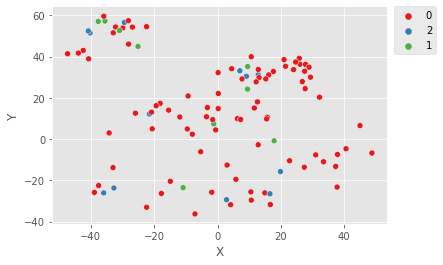

In [331]:
sns.scatterplot(data=tsne_haplo_x3,x="X", y="Y",hue="haplogrupos",palette="Set1" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [332]:
# Modelos clasificación - (x3 - solo Ratios)

In [333]:
### CART con variables de PCA target HAPLOGRUPOS - (x3 - solo Ratios)

In [334]:
pca_haplo_x3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          1688 non-null   float64
 1   PC2          1688 non-null   float64
 2   PC3          1688 non-null   float64
 3   PC4          1688 non-null   float64
 4   PC5          1688 non-null   float64
 5   PC6          1688 non-null   float64
 6   PC7          1688 non-null   float64
 7   PC8          1688 non-null   float64
 8   PC9          1688 non-null   float64
 9   PC10         1688 non-null   float64
 10  PC11         1688 non-null   float64
 11  haplogrupos  106 non-null    object 
dtypes: float64(11), object(1)
memory usage: 158.4+ KB


In [335]:
nuevo_pca_haplo_x3 = pca_haplo_x3.dropna()

In [336]:
nuevo_pca_haplo_x3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 1664
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          106 non-null    float64
 1   PC2          106 non-null    float64
 2   PC3          106 non-null    float64
 3   PC4          106 non-null    float64
 4   PC5          106 non-null    float64
 5   PC6          106 non-null    float64
 6   PC7          106 non-null    float64
 7   PC8          106 non-null    float64
 8   PC9          106 non-null    float64
 9   PC10         106 non-null    float64
 10  PC11         106 non-null    float64
 11  haplogrupos  106 non-null    object 
dtypes: float64(11), object(1)
memory usage: 10.8+ KB


In [337]:
X_PCA = nuevo_pca_haplo_x3[['PC1', 'PC2', 'PC3', 'PC4','PC5']]
y_PCA = nuevo_pca_haplo_x3['haplogrupos']

In [338]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y_PCA,stratify = nuevo_pca_haplo_x3['haplogrupos'],random_state=0)

In [339]:
clf_dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
clf_dt = clf_dt.fit(X_train_PCA,y_train_PCA)

<Figure size 1080x540 with 0 Axes>

[Text(548.0357142857142, 385.05, 'PC5 <= 0.351\ngini = 0.343\nsamples = 79\nvalue = [63, 7, 9]\nclass = 0'),
 Text(338.7857142857143, 339.75, 'PC1 <= -2.669\ngini = 0.491\nsamples = 46\nvalue = [31, 6, 9]\nclass = 0'),
 Text(159.42857142857142, 294.45, 'PC5 <= -0.884\ngini = 0.66\nsamples = 10\nvalue = [3, 4, 3]\nclass = 1'),
 Text(79.71428571428571, 249.15, 'PC2 <= 0.463\ngini = 0.32\nsamples = 5\nvalue = [1, 4, 0]\nclass = 1'),
 Text(39.857142857142854, 203.85, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 0'),
 Text(119.57142857142856, 203.85, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = 1'),
 Text(239.1428571428571, 249.15, 'PC3 <= 2.316\ngini = 0.48\nsamples = 5\nvalue = [2, 0, 3]\nclass = 2'),
 Text(199.28571428571428, 203.85, 'PC2 <= 3.628\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]\nclass = 0'),
 Text(159.42857142857142, 158.55, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = 0'),
 Text(239.1428571428571, 158.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]

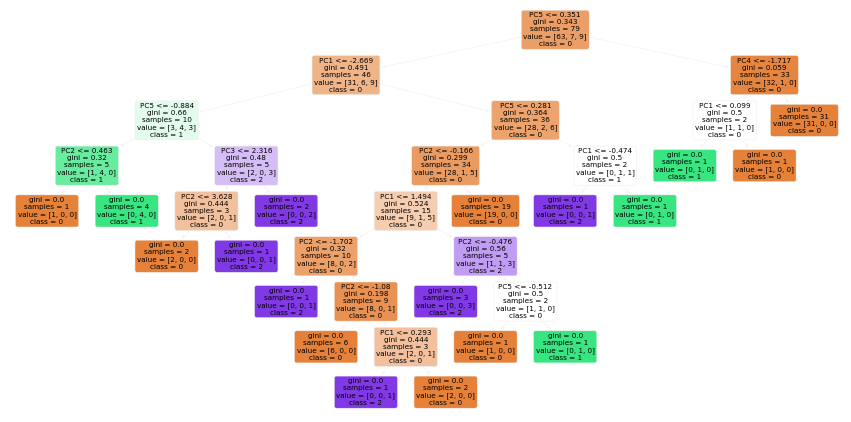

In [343]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0","1", "2"], 
          feature_names=X_train_PCA.columns)

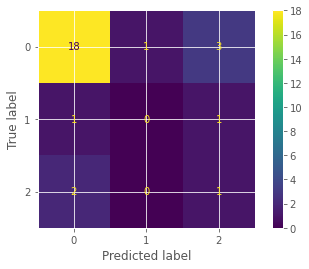

In [344]:
plot_confusion_matrix(clf_dt, X_test_PCA, y_test_PCA, display_labels=["0","1","2"])

In [345]:
accuracy_score(y_test_PCA, clf_dt.predict(X_test_PCA))

0.7037037037037037

### Proyección - (x2 - ratios)

In [347]:
#nuevo dataset con cada participación de feature
nuevo_data_pca_x2 = pd.DataFrame(pca_2.fit_transform(df_x2), index =df_x2.index,\
                              columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9'])

In [348]:
nuevo_data_pca_x2.reset_index()

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0,0.769419,-0.597519,0.486768,0.414847,0.685242,0.666236,0.041293,0.205567,0.059007
1,1,-1.965020,-0.556383,-0.190305,-0.038827,0.201666,-0.163474,-0.072677,0.012814,-0.011095
2,2,-0.327024,-0.542700,-0.273205,0.056893,-0.348367,0.229927,0.018605,0.061560,0.008235
3,3,-0.468594,-0.864720,1.966777,-0.132383,0.095786,-0.165763,-0.125549,-0.061582,-0.060734
4,4,0.850731,-0.599216,0.467792,0.409250,0.715043,0.768074,0.022608,0.071191,-0.000309
...,...,...,...,...,...,...,...,...,...,...
1683,1683,-0.575260,-0.692840,0.699244,-0.031377,-0.388372,0.237987,0.049953,0.034563,-0.008434
1684,1684,-0.564640,-0.693592,0.712659,-0.107300,-0.378027,0.038332,0.079655,0.044052,0.005925
1685,1685,-0.517661,-0.612725,-0.200789,-0.937370,-0.080384,0.536270,0.004000,0.148746,-0.012910
1686,1686,-0.455375,-0.602429,-0.250684,-0.845189,-0.134336,0.575116,0.026721,0.096450,-0.028089


In [349]:
data.reset_index()

,index,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,...,Power_NV,Power_Ratio_LE_AE,Power_Ratio_LT_AT,Power_Ratio_LA_AA,Power_Ratio_LE_LT,Power_Ratio_AE_AT,Power_Ratio_LA_LT,Power_Ratio_AA_AT,Power_Ratio_LE_LA,Power_Ratio_AE_AA
0,0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,...,777.205187,0.018097,0.312515,0.547826,0.002042,0.035268,0.193792,0.110551,0.010539,0.319022
1,1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,...,610.134461,0.004648,0.259414,0.711718,0.000984,0.054918,0.248472,0.090566,0.003960,0.606388
2,2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,...,681.841766,0.006906,0.272619,0.303272,0.001001,0.039531,0.141263,0.126985,0.007089,0.311305
3,3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,...,875.781161,0.012346,0.380882,0.324194,0.003172,0.097870,0.081302,0.095518,0.039018,1.024614
4,4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,...,783.109853,0.018545,0.326245,0.519637,0.002079,0.036576,0.201706,0.126638,0.010308,0.288824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,554,25,6.12,1.96,12.97,9.71,7.76,5.23,5.25,...,759.691406,0.010520,0.314135,0.206329,0.001660,0.049573,0.084165,0.128141,0.019725,0.386864
1684,1684,554,26,6.29,1.93,12.96,9.76,7.58,5.23,5.26,...,765.496090,0.008864,0.321647,0.226637,0.001529,0.055486,0.082453,0.117019,0.018545,0.474161
1685,1685,554,27,5.59,1.47,13.51,9.58,8.04,6.33,5.34,...,813.139443,0.004782,0.252837,0.384229,0.000554,0.029311,0.190613,0.125430,0.002908,0.233681
1686,1686,554,28,5.61,1.50,13.52,9.68,8.18,6.33,5.32,...,801.025846,0.005111,0.262781,0.358593,0.000577,0.029645,0.182858,0.134001,0.003153,0.221227


In [350]:
pca_haplo_x2= pd.concat([nuevo_data_pca_x2, data["haplogrupos"]], axis=1)

In [351]:
pca_haplo_x2.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,haplogrupos
0,0.769419,-0.597519,0.486768,0.414847,0.685242,0.666236,0.041293,0.205567,0.059007,0
1,-1.965020,-0.556383,-0.190305,-0.038827,0.201666,-0.163474,-0.072677,0.012814,-0.011095,2
2,-0.327024,-0.542700,-0.273205,0.056893,-0.348367,0.229927,0.018605,0.061560,0.008235,NaN
3,-0.468594,-0.864720,1.966777,-0.132383,0.095786,-0.165763,-0.125549,-0.061582,-0.060734,NaN
4,0.850731,-0.599216,0.467792,0.409250,0.715043,0.768074,0.022608,0.071191,-0.000309,NaN


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

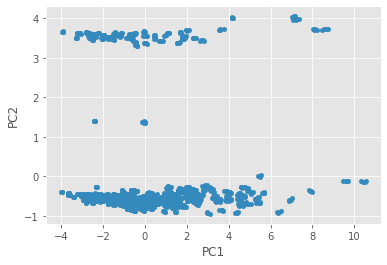

In [352]:
pca_haplo_x2.plot(x="PC1", y="PC2", kind ="scatter")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

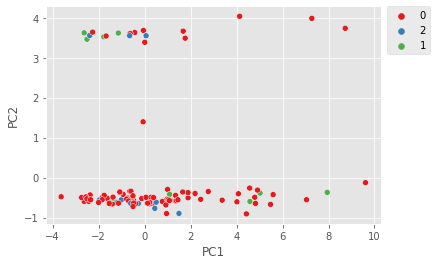

In [353]:
sns.scatterplot(data=pca_haplo_x2,x="PC1", y="PC2",hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

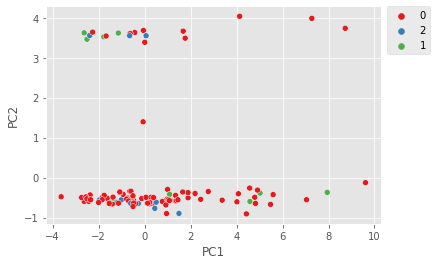

In [354]:
sns.scatterplot(data=pca_haplo_x2,x=pca_haplo_x2.PC1, y=pca_haplo_x2.PC2,hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [355]:
pca_4.explained_variance_ratio_

array([0.35067269, 0.21746512, 0.16128571, 0.10788445, 0.09816497,
       0.0393965 , 0.01154897, 0.00467711, 0.00432097, 0.00267022,
       0.00191328])

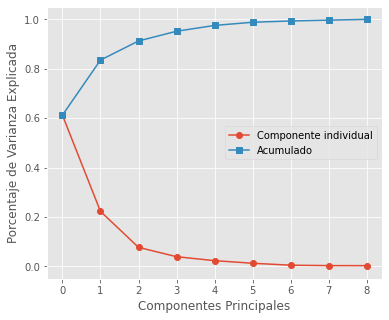

In [356]:
plt.figure(figsize=(6,5))

plt.plot(pca_2.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

In [357]:
## Prueba TSNE - (x2 - solo powers)

In [359]:
tsne = TSNE(random_state=42)

proj_tsne_x2 = tsne.fit_transform(df_x2)

In [360]:
df_x2.head()

,0,1,2,3,4,5,6,7,8
0,1.154010,-0.357865,0.282269,0.175066,0.521446,0.080256,0.393611,-0.391159,0.403156
1,-0.726906,-0.700299,-0.907626,-0.806395,-0.501737,-0.892336,-0.652027,-0.391159,0.403156
2,-0.244439,-0.306054,-0.090606,0.041019,-0.321729,0.184689,-0.203236,-0.391159,0.403156
3,1.031730,0.144643,-0.481210,-0.753926,-1.009074,-0.820114,1.010564,-0.391159,0.403156
4,1.195883,-0.366353,0.282269,0.096814,0.605445,0.234591,0.430566,-0.391159,0.403156


In [361]:
df_tsne_x2= pd.DataFrame(proj_tsne_x2)

In [362]:
df_tsne_x2.head()

,0,1
0,-21.470926,22.143183
1,42.815845,-15.714681
2,8.764060,5.574784
3,-14.573481,-14.703093
4,-21.612427,22.221329


In [363]:
tsne_haplo_x2= pd.concat([df_tsne_x2, data["haplogrupos"]], axis=1)

In [364]:
tsne_haplo_x2.columns = ["X","Y","haplogrupos"]

In [365]:
tsne_haplo_x2.head()

,X,Y,haplogrupos
0,-21.470926,22.143183,0
1,42.815845,-15.714681,2
2,8.764060,5.574784,NaN
3,-14.573481,-14.703093,NaN
4,-21.612427,22.221329,NaN


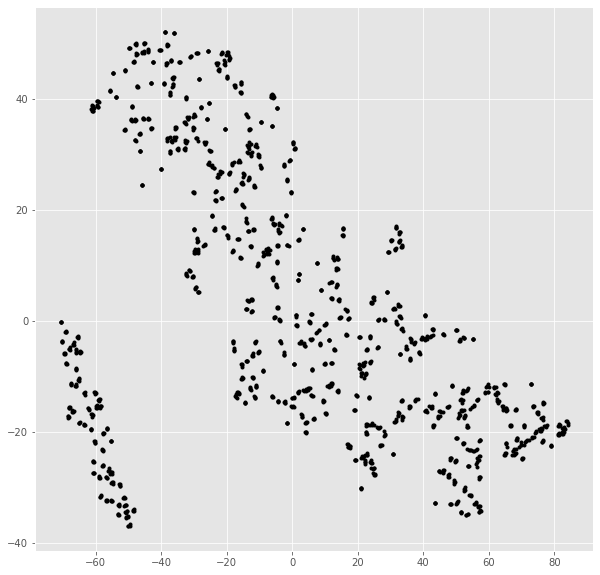

In [366]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne_x2[:, 0]
coord_y = proj_tsne_x2[:, 1]
ax.plot(coord_x, coord_y, '.k')

<AxesSubplot:xlabel='X', ylabel='Y'>

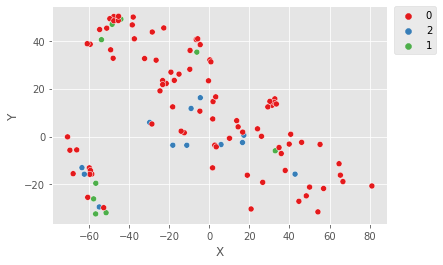

In [367]:
sns.scatterplot(data=tsne_haplo_x2,x="X", y="Y",hue="haplogrupos",palette="Set1" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### CART (x2 - solo powers)

In [370]:
pca_haplo_x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          1688 non-null   float64
 1   PC2          1688 non-null   float64
 2   PC3          1688 non-null   float64
 3   PC4          1688 non-null   float64
 4   PC5          1688 non-null   float64
 5   PC6          1688 non-null   float64
 6   PC7          1688 non-null   float64
 7   PC8          1688 non-null   float64
 8   PC9          1688 non-null   float64
 9   haplogrupos  106 non-null    object 
dtypes: float64(9), object(1)
memory usage: 132.0+ KB


In [371]:
nuevo_pca_haplo_x2 = pca_haplo_x2.dropna()

In [372]:
nuevo_pca_haplo_x2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 1664
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          106 non-null    float64
 1   PC2          106 non-null    float64
 2   PC3          106 non-null    float64
 3   PC4          106 non-null    float64
 4   PC5          106 non-null    float64
 5   PC6          106 non-null    float64
 6   PC7          106 non-null    float64
 7   PC8          106 non-null    float64
 8   PC9          106 non-null    float64
 9   haplogrupos  106 non-null    object 
dtypes: float64(9), object(1)
memory usage: 9.1+ KB


In [421]:
X_PCA = nuevo_pca_haplo_x2[['PC1', 'PC2', 'PC3']]
y_PCA = nuevo_pca_haplo_x2['haplogrupos']

In [422]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y_PCA,stratify = nuevo_pca_haplo_x2['haplogrupos'],random_state=0)

In [423]:
clf_dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
clf_dt = clf_dt.fit(X_train_PCA,y_train_PCA)

<Figure size 1080x540 with 0 Axes>

[Text(414.76339285714283, 385.05, 'PC2 <= -0.747\ngini = 0.343\nsamples = 79\nvalue = [63, 7, 9]\nclass = 0'),
 Text(283.98214285714283, 339.75, 'PC3 <= 2.202\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]\nclass = 2'),
 Text(254.08928571428572, 294.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = 2'),
 Text(313.875, 294.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 0'),
 Text(545.5446428571429, 339.75, 'PC2 <= 3.505\ngini = 0.318\nsamples = 76\nvalue = [62, 7, 7]\nclass = 0'),
 Text(373.6607142857143, 294.45, 'PC1 <= 4.966\ngini = 0.233\nsamples = 62\nvalue = [54, 4, 4]\nclass = 0'),
 Text(269.0357142857143, 249.15, 'PC2 <= -0.555\ngini = 0.193\nsamples = 57\nvalue = [51, 2, 4]\nclass = 0'),
 Text(179.35714285714286, 203.85, 'PC2 <= -0.558\ngini = 0.278\nsamples = 24\nvalue = [20, 0, 4]\nclass = 0'),
 Text(149.46428571428572, 158.55, 'PC3 <= 0.155\ngini = 0.227\nsamples = 23\nvalue = [20, 0, 3]\nclass = 0'),
 Text(89.67857142857143, 113.25, 'PC2 <= -0.591\ngini = 0.4

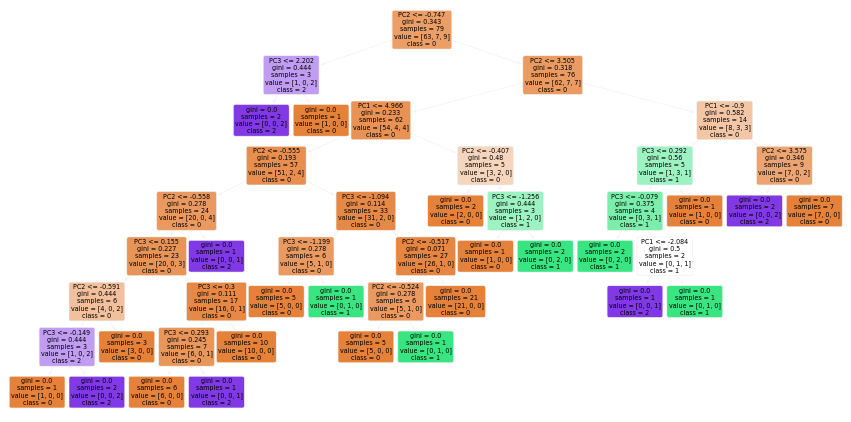

In [424]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0","1", "2"], 
          feature_names=X_train_PCA.columns)

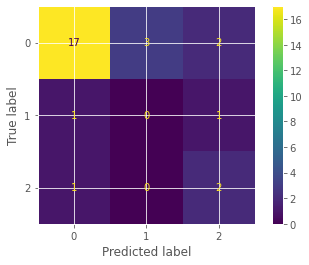

In [425]:
plot_confusion_matrix(clf_dt, X_test_PCA, y_test_PCA, display_labels=["0","1","2"])

In [426]:
accuracy_score(y_test_PCA, clf_dt.predict(X_test_PCA))

0.7037037037037037

### Proyección - (x1 - medidas)

In [382]:
#nuevo dataset con cada participación de feature
nuevo_data_pca_x1 = pd.DataFrame(pca_1.fit_transform(df_x1), index =df_x1.index,\
                              columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9'])

In [383]:
nuevo_data_pca_x1.reset_index()

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0,1.278774,-0.536093,-0.271893,0.411321,0.694559,0.661451,0.146662,-0.094817,0.218891
1,1,-2.029561,-0.608890,0.136322,-0.167529,0.319074,-0.294711,0.166925,-0.033657,-0.054763
2,2,0.198705,-0.542933,0.209993,0.168832,-0.399505,0.250548,-0.019574,-0.027659,0.074897
3,3,-0.418944,-0.909279,-2.285718,-0.073386,0.010667,-0.377978,-0.007401,0.006408,-0.090240
4,4,1.351391,-0.533889,-0.240609,0.397657,0.707854,0.773217,0.135231,-0.064914,0.087179
...,...,...,...,...,...,...,...,...,...,...
1683,1683,-0.192669,-0.738952,-1.004813,0.107418,-0.599368,0.241658,-0.101994,-0.023429,0.079126
1684,1684,-0.183407,-0.737464,-1.024123,0.041573,-0.566872,0.013586,-0.144419,-0.009492,0.091615
1685,1685,-0.156728,-0.560395,0.438587,-0.996248,-0.159879,0.562186,-0.006103,-0.122725,0.186342
1686,1686,-0.069782,-0.554143,0.452774,-0.882465,-0.206218,0.615290,-0.042214,-0.101004,0.147312


In [384]:
data.reset_index()

,index,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,...,Power_NV,Power_Ratio_LE_AE,Power_Ratio_LT_AT,Power_Ratio_LA_AA,Power_Ratio_LE_LT,Power_Ratio_AE_AT,Power_Ratio_LA_LT,Power_Ratio_AA_AT,Power_Ratio_LE_LA,Power_Ratio_AE_AA
0,0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,...,777.205187,0.018097,0.312515,0.547826,0.002042,0.035268,0.193792,0.110551,0.010539,0.319022
1,1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,...,610.134461,0.004648,0.259414,0.711718,0.000984,0.054918,0.248472,0.090566,0.003960,0.606388
2,2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,...,681.841766,0.006906,0.272619,0.303272,0.001001,0.039531,0.141263,0.126985,0.007089,0.311305
3,3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,...,875.781161,0.012346,0.380882,0.324194,0.003172,0.097870,0.081302,0.095518,0.039018,1.024614
4,4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,...,783.109853,0.018545,0.326245,0.519637,0.002079,0.036576,0.201706,0.126638,0.010308,0.288824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,554,25,6.12,1.96,12.97,9.71,7.76,5.23,5.25,...,759.691406,0.010520,0.314135,0.206329,0.001660,0.049573,0.084165,0.128141,0.019725,0.386864
1684,1684,554,26,6.29,1.93,12.96,9.76,7.58,5.23,5.26,...,765.496090,0.008864,0.321647,0.226637,0.001529,0.055486,0.082453,0.117019,0.018545,0.474161
1685,1685,554,27,5.59,1.47,13.51,9.58,8.04,6.33,5.34,...,813.139443,0.004782,0.252837,0.384229,0.000554,0.029311,0.190613,0.125430,0.002908,0.233681
1686,1686,554,28,5.61,1.50,13.52,9.68,8.18,6.33,5.32,...,801.025846,0.005111,0.262781,0.358593,0.000577,0.029645,0.182858,0.134001,0.003153,0.221227


In [385]:
pca_haplo_x1= pd.concat([nuevo_data_pca_x1, data["haplogrupos"]], axis=1)

In [386]:
pca_haplo_x1.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,haplogrupos
0,1.278774,-0.536093,-0.271893,0.411321,0.694559,0.661451,0.146662,-0.094817,0.218891,0
1,-2.029561,-0.608890,0.136322,-0.167529,0.319074,-0.294711,0.166925,-0.033657,-0.054763,2
2,0.198705,-0.542933,0.209993,0.168832,-0.399505,0.250548,-0.019574,-0.027659,0.074897,NaN
3,-0.418944,-0.909279,-2.285718,-0.073386,0.010667,-0.377978,-0.007401,0.006408,-0.090240,NaN
4,1.351391,-0.533889,-0.240609,0.397657,0.707854,0.773217,0.135231,-0.064914,0.087179,NaN


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

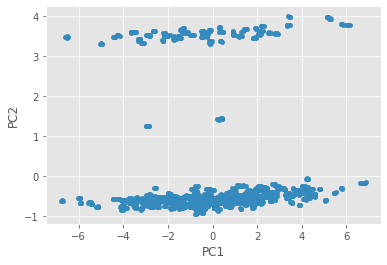

In [387]:
pca_haplo_x1.plot(x="PC1", y="PC2", kind ="scatter")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

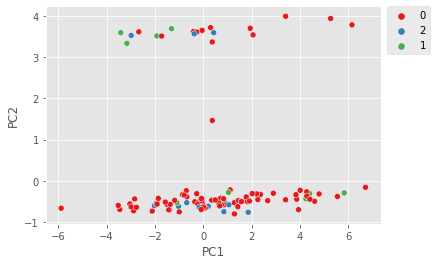

In [388]:
sns.scatterplot(data=pca_haplo_x1,x="PC1", y="PC2",hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

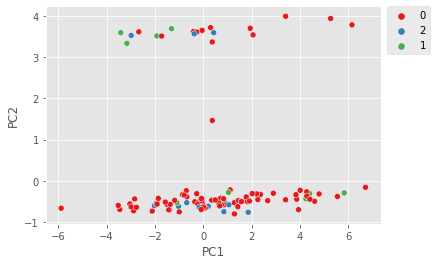

In [389]:
sns.scatterplot(data=pca_haplo_x1,x=pca_haplo_x1.PC1, y=pca_haplo_x1.PC2,hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [390]:
pca_1.explained_variance_ratio_

array([0.63691166, 0.22227471, 0.07150333, 0.02924664, 0.01859941,
       0.01113719, 0.00416907, 0.00318363, 0.00297435])

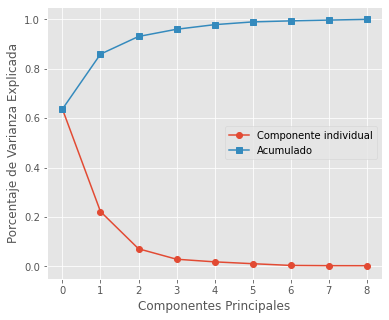

In [391]:
plt.figure(figsize=(6,5))

plt.plot(pca_1.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(pca_1.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

## Prueba TSNE - (x1 - solo medidas)

In [394]:
tsne = TSNE(random_state=42)

proj_tsne_x1 =  tsne.fit_transform(df_x1)

In [395]:
df_x1.head()

,0,1,2,3,4,5,6,7,8
0,-0.165818,1.238365,0.391905,0.495167,0.321955,0.760541,0.454609,-0.391159,0.403156
1,-0.624470,-0.779665,-0.843994,-1.029964,-1.064153,-0.442926,-0.584837,-0.391159,0.403156
2,-0.104664,0.016926,0.258016,0.119107,0.427331,-0.180352,-0.115410,-0.391159,0.403156
3,0.364181,1.158706,-0.756451,-0.354450,-0.918247,-1.438522,0.991097,-0.391159,0.403156
4,-0.176010,1.264918,0.314661,0.495167,0.475967,0.837125,0.488139,-0.391159,0.403156


In [396]:
df_tsne_x1= pd.DataFrame(proj_tsne_x1)

In [397]:
df_tsne_x1.head()

,0,1
0,-34.292675,-11.824125
1,40.772354,-1.478211
2,-0.789214,-4.178360
3,5.268590,-36.844326
4,-34.427574,-11.819998


In [398]:
tsne_haplo_x1= pd.concat([df_tsne_x1, data["haplogrupos"]], axis=1)

In [399]:
tsne_haplo_x1.columns = ["X","Y","haplogrupos"]

In [400]:
tsne_haplo_x1.head()

,X,Y,haplogrupos
0,-34.292675,-11.824125,0
1,40.772354,-1.478211,2
2,-0.789214,-4.178360,NaN
3,5.268590,-36.844326,NaN
4,-34.427574,-11.819998,NaN


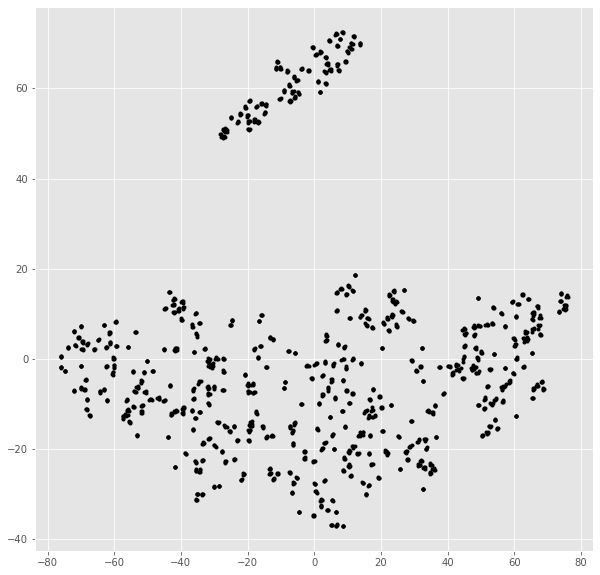

In [401]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne_x1[:, 0]
coord_y = proj_tsne_x1[:, 1]
ax.plot(coord_x, coord_y, '.k')

<AxesSubplot:xlabel='X', ylabel='Y'>

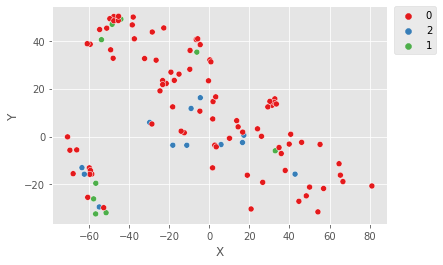

In [402]:
sns.scatterplot(data=tsne_haplo_x2,x="X", y="Y",hue="haplogrupos",palette="Set1" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### CART  (x1 - solo medidas)

In [405]:
pca_haplo_x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          1688 non-null   float64
 1   PC2          1688 non-null   float64
 2   PC3          1688 non-null   float64
 3   PC4          1688 non-null   float64
 4   PC5          1688 non-null   float64
 5   PC6          1688 non-null   float64
 6   PC7          1688 non-null   float64
 7   PC8          1688 non-null   float64
 8   PC9          1688 non-null   float64
 9   haplogrupos  106 non-null    object 
dtypes: float64(9), object(1)
memory usage: 132.0+ KB


In [406]:
nuevo_pca_haplo_x1 = pca_haplo_x1.dropna()

In [407]:
nuevo_pca_haplo_x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 1664
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          106 non-null    float64
 1   PC2          106 non-null    float64
 2   PC3          106 non-null    float64
 3   PC4          106 non-null    float64
 4   PC5          106 non-null    float64
 5   PC6          106 non-null    float64
 6   PC7          106 non-null    float64
 7   PC8          106 non-null    float64
 8   PC9          106 non-null    float64
 9   haplogrupos  106 non-null    object 
dtypes: float64(9), object(1)
memory usage: 9.1+ KB


In [415]:
X_PCA = nuevo_pca_haplo_x1[['PC1', 'PC2', 'PC3']]
y_PCA = nuevo_pca_haplo_x1['haplogrupos']

In [416]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y_PCA,stratify = nuevo_pca_haplo_x1['haplogrupos'],random_state=0)

In [417]:
clf_dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
clf_dt = clf_dt.fit(X_train_PCA,y_train_PCA)

<Figure size 1080x540 with 0 Axes>

[Text(336.44117647058823, 382.21875, 'PC2 <= -0.315\ngini = 0.343\nsamples = 79\nvalue = [63, 7, 9]\nclass = 0'),
 Text(180.52941176470586, 331.25625, 'PC3 <= -1.194\ngini = 0.226\nsamples = 55\nvalue = [48, 1, 6]\nclass = 0'),
 Text(114.88235294117646, 280.29375, 'PC2 <= -0.73\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]\nclass = 2'),
 Text(82.05882352941175, 229.33124999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = 2'),
 Text(147.70588235294116, 229.33124999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 0'),
 Text(246.17647058823528, 280.29375, 'PC2 <= -0.529\ngini = 0.177\nsamples = 52\nvalue = [47, 1, 4]\nclass = 0'),
 Text(213.35294117647058, 229.33124999999998, 'PC2 <= -0.542\ngini = 0.322\nsamples = 26\nvalue = [21, 1, 4]\nclass = 0'),
 Text(131.2941176470588, 178.36875, 'PC1 <= 0.865\ngini = 0.165\nsamples = 22\nvalue = [20, 0, 2]\nclass = 0'),
 Text(65.6470588235294, 127.40625, 'PC1 <= -0.201\ngini = 0.095\nsamples = 20\nvalue = [19, 0, 1]\nclass 

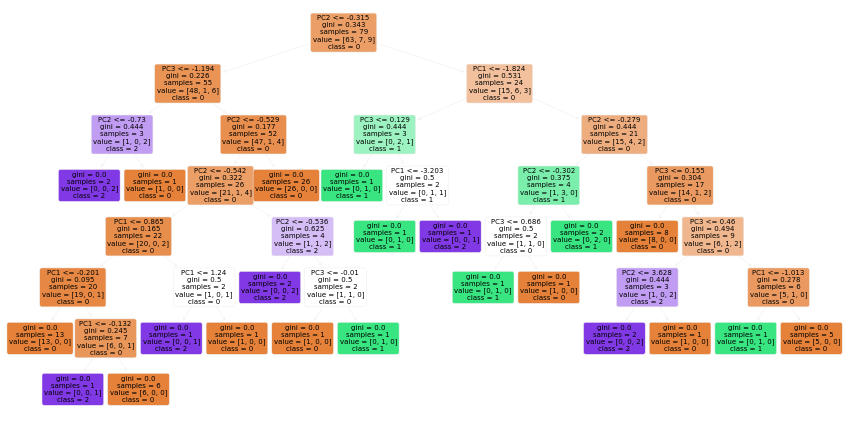

In [418]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0","1", "2"], 
          feature_names=X_train_PCA.columns)

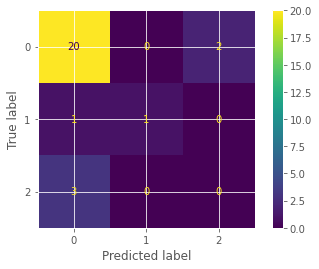

In [419]:
plot_confusion_matrix(clf_dt, X_test_PCA, y_test_PCA, display_labels=["0","1","2"])

In [420]:
accuracy_score(y_test_PCA, clf_dt.predict(X_test_PCA))

0.7777777777777778

## CART con oversampling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataNa = data.dropna()

In [ ]:
dataNa.shape

In [ ]:
newX = dataNa[['AE','LE','AT','LT','AA','LA','NV','Morfotipo_1','Morfotipo_2','Labio','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]
newy = dataNa['haplogrupos']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(newX,newy,stratify = dataNa['haplogrupos'],random_state=0)

In [ ]:
# chequeamos la presencia relativa de cada clase y el tamaño de los datasets
print('Entrenamiento:',X_train.shape)
print('Testeo:',X_test.shape)
print('\nClases train:')
print(y_train.value_counts(normalize=True))
print('\nClases test:')
print(y_test.value_counts(normalize=True))

### OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

In [ ]:
X_train_os2,y_train_os2=oversampler.fit_resample(X_train_os,y_train_os);

print('Composición del training set:')
print(y_train_os2.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

### CART con variables originales oversampleadas

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth = 7, random_state=42)
clf_dt = clf_dt.fit(X_train_os2,y_train_os2)

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["LU","DU", "LB"], 
          feature_names=X_train_os2.columns); 

In [ ]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["LU","DU","LB"])

In [ ]:
accuracy_score(y_test, clf_dt.predict(X_test))

## XGBoost

In [ ]:
from xgboost import XGBClassifier


In [ ]:
y_train_PCA = y_train_PCA.astype("int")

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train_PCA)
y_train_PCA = le.transform(y_train_PCA)

In [ ]:
xgboost = XGBClassifier()

In [ ]:
clf_XGB = xgboost.fit(X_train_PCA,y_train_PCA)

In [ ]:
accuracy_score(le.transform(y_test_PCA), xgboost.predict(X_test_PCA))